In [186]:
#importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



<------------------Top 50 bowlers of all Seasons---------------------->


         Player_Name  Total_wickets
121       SL Malinga            120
28   Harbhajan Singh            107
39         PP Chawla            101
81          A Mishra            100
42          DJ Bravo             98
44           A Nehra             81
125         R Ashwin             79
79           PP Ojha             76
9             Z Khan             75
36          RP Singh             74
17         SR Watson             73
49     R Vinay Kumar             71
67         JA Morkel             70
15         IK Pathan             69
177          B Kumar             69
8            P Kumar             68
48       DS Kulkarni             67
208        MM Sharma             67
59          DW Steyn             66
90          L Balaji             61
18         RA Jadeja             59
20          SK Warne             57
222        YS Chahal             56
78          MM Patel             55
65          AB Dinda    

Text(0.5, 1.0, 'Bottom_10 bowlers of all seasons')

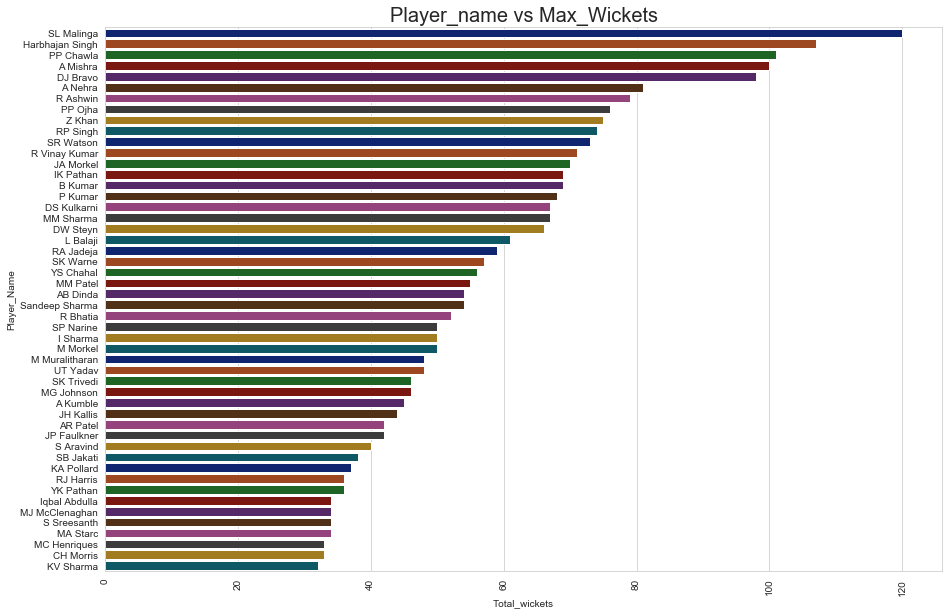

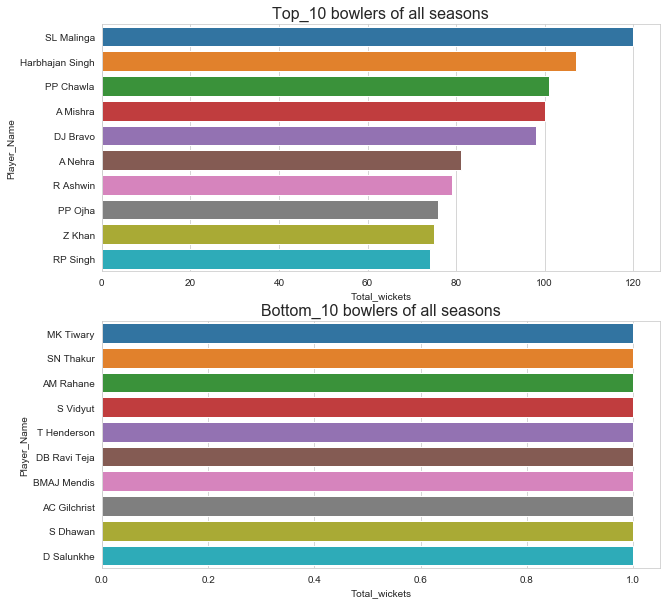

In [187]:
#players with most wickets

data=pd.read_csv('Ball_by_Ball.csv')
data1=pd.read_csv("Player.csv")
data2=pd.read_csv('Match.csv')
data3=pd.read_csv("Player_Match.csv")
data4=pd.read_csv('Season.csv')
data5=pd.read_csv("Team.csv")

data['Total']=data['Batsman_Scored']+data['Extra_Runs']
data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
data['Extra_Runs']=data['Extra_Runs'].replace(' ','0').astype(int)
ball=pd.DataFrame(data)
ball=ball.loc[(ball.Dissimal_Type != 'run out') & 
                             (ball.Dissimal_Type != 'hit wicket') & 
                             (ball.Dissimal_Type != ' ') & (ball.Dissimal_Type != 'retired hurt')]
wicket=ball.groupby(['Bowler_Id'])
wickets=wicket['Dissimal_Type'].count()
a=pd.DataFrame(wickets)
player_name=data1.rename(index=str,columns={'Player_Id':'Bowler_Id'})
player_name=player_name.drop(['Is_Umpire','Unnamed: 7'],axis=1)
df=a.merge(player_name,on='Bowler_Id')
b=df.loc[:,['Bowler_Id','Player_Name','Dissimal_Type']].sort_values(by='Dissimal_Type',
            ascending=False).rename(columns={'Dissimal_Type':'Total_wickets'})

bowler_wickets=b.loc[(b.Total_wickets>=1),:].head(50).drop('Bowler_Id',axis=1)
bowlers_with_one_wicket=b.loc[(b.Total_wickets==1),:]


top10_bowlers=bowler_wickets.head(10)
bottom_10=bowlers_with_one_wicket.sort_values(by='Total_wickets',ascending=True).head(10).drop('Bowler_Id',axis=1)


                   #-----------------top 50 bowlers 0f all seasons-------------------
print('\n\n<------------------Top 50 bowlers of all Seasons---------------------->\n\n')
print(bowler_wickets)
name=b['Player_Name']
wickets=b['Total_wickets']
plt.figure(figsize=(15,10))
sns.barplot(x='Total_wickets', y="Player_Name", data=bowler_wickets,palette='dark')
plt.title('Player_name vs Max_Wickets',fontsize=20)
plt.xticks(rotation=90)

                   #-----------------top 10 bowlers 0f all seasons-------------------

print('\n\n<------------------Top 10 bowlers of all Seasons---------------------->\n\n')
print(top10_bowlers)
f,axes=plt.subplots(2,1,figsize=(10,10))
sns.barplot(x='Total_wickets', y="Player_Name", data=top10_bowlers,ax=axes[0])
axes[0].set_title('Top_10 bowlers of all seasons',fontsize=16)

                   #-----------------top 10 bowlers 0f all seasons-------------------

print('\n\n<------------------Bottom 10 bowlers of all Seasons---------------------->\n\n')
print(bottom_10)
sns.barplot(x='Total_wickets', y="Player_Name", data=bottom_10,ax=axes[1])
axes[1].set_title('Bottom_10 bowlers of all seasons',fontsize=16)


We are ignoring batsmen who scored zero score because
those values cant be plotted on the graph and it is showing -ve values on score(axis)
       Player_Name  Batsman_Scored
4          S Ladda               0
6         M Ashwin               0
5           U Kaul               0
8        IC Pandey               0
3       YA Abdulla               0
2       RR Bhatkal               0
7         L Ablish               0
1       PJ Cummins               0
9    Swapnil Singh               0
10        ND Doshi               0
11    Abdur Razzak               0
12         A Zampa               0
13       S Kaushik               0
14     Sunny Gupta               0
15         C Nanda               0
0   V Pratap Singh               0


<------------------Top 50 batsmen of all Seasons---------------------->


          Player_Name  Batsman_Scored
433          SK Raina            4106
432           V Kohli            4105
431         RG Sharma            3874
430         G Gambhir            3634

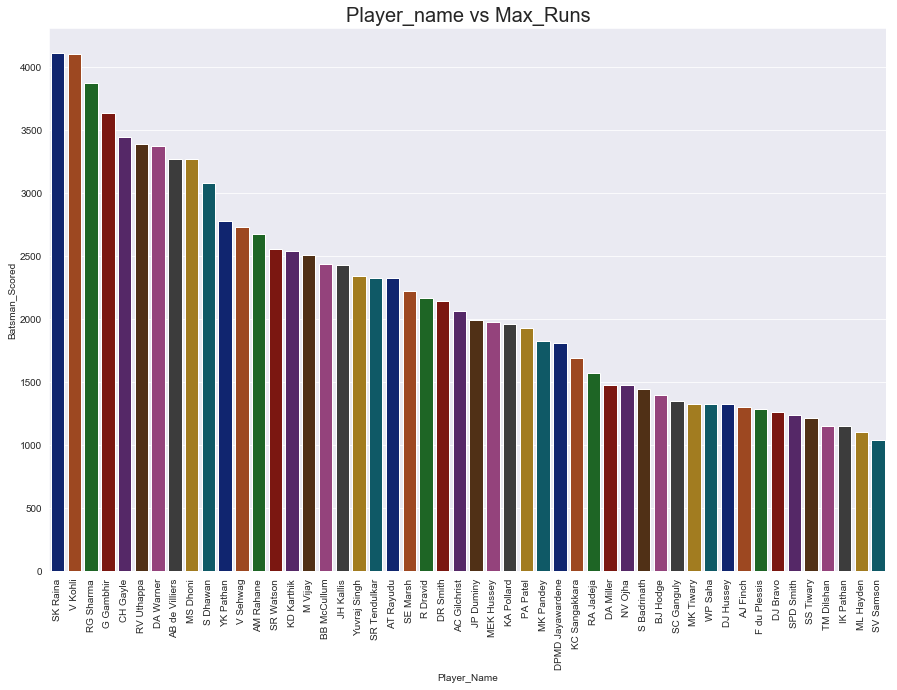

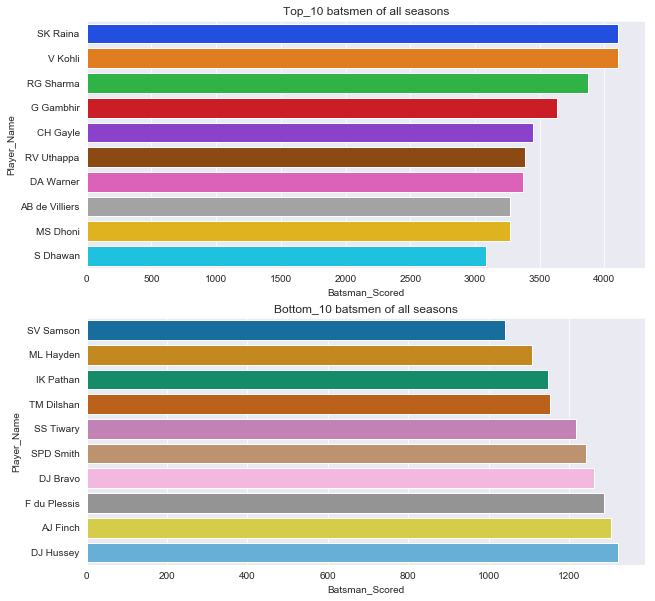

In [40]:
#highest runs

data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
run=data.groupby(['Striker_Id'])
run1=run['Batsman_Scored'].sum().sort_values()
runs=pd.DataFrame(run1)
runs.sort_values(by='Batsman_Scored',ascending=False)
batsman=data1.rename(index=str,columns={'Player_Id':'Striker_Id'})
batsman=batsman.drop(['Is_Umpire','Unnamed: 7'],axis=1)
batsman_name=runs.merge(batsman,on='Striker_Id')
batsman_name=batsman_name.loc[:,['Striker_Id','Player_Name',
            'Batsman_Scored']].sort_values(by='Batsman_Scored',ascending=False)

players_runs=batsman_name.loc[(batsman_name.Batsman_Scored>=1),:].head(50).drop('Striker_Id',axis=1)
players_with_zero_runs=batsman_name.loc[(batsman_name.Batsman_Scored==0),('Player_Name','Batsman_Scored')]


print('We are ignoring batsmen who scored zero score because\nthose values cant be plotted on the graph and it is showing -ve values on score(axis)')
print(players_with_zero_runs)

top10_batsmen=players_runs.head(10)
bottom10_batsmen=players_runs.sort_values(by='Batsman_Scored').head(10)

sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
                   #-----------------top 50 batsmen 0f all seasons-------------------
print('\n\n<------------------Top 50 batsmen of all Seasons---------------------->\n\n')
print(players_runs)
sns.barplot(x='Player_Name', y='Batsman_Scored', data=players_runs,palette='dark')
plt.title('Player_name vs Max_Runs',fontsize=20)
plt.xticks(rotation=90)


                   #-----------------top 10 batsmen 0f all seasons-------------------
print('\n\n<------------------Top 10 batsmen of all Seasons---------------------->\n\n')
print(top10_batsmen)
f,axes=plt.subplots(2,1,figsize=(10,10))
sns.barplot(x='Batsman_Scored', y="Player_Name", data=top10_batsmen,ax=axes[0],palette='bright')
axes[0].set_title('Top_10 batsmen of all seasons')

                   #-----------------bottom 10 batsmen 0f all seasons-------------------
print('\n\n<------------------Top 10 batsmen of all Seasons---------------------->\n\n')
print(bottom10_batsmen)
axes[1].set_title('Bottom_10 batsmen of all seasons')
sns.barplot(x='Batsman_Scored', y="Player_Name", data=bottom10_batsmen,ax=axes[1],palette='colorblind')




<---------------------------Top 30 players with maximum number of fours of all season-------------------->


          Player_Name  Max_fours
37          G Gambhir        422
7             V Kohli        360
19           SK Raina        360
39           S Dhawan        348
43         RV Uthappa        341
160         DA Warner        338
38           V Sehwag        334
54          RG Sharma        323
123      SR Tendulkar        295
81          AM Rahane        285
140          CH Gayle        281
103    AB de Villiers        275
5            R Dravid        268
84         KD Karthik        256
8           JH Kallis        255
29          SR Watson        251
15           PA Patel        248
1         BB McCullum        248
50       AC Gilchrist        238
158           M Vijay        237
18           MS Dhoni        236
93           SE Marsh        233
28          YK Pathan        231
130          DR Smith        213
61   DPMD Jayawardene        200
17         MEK Hussey        19

Text(0.5, 1.0, 'Comparison of maximum fours of some players of all seasons')

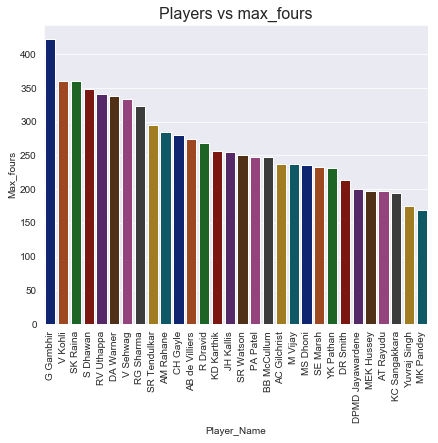

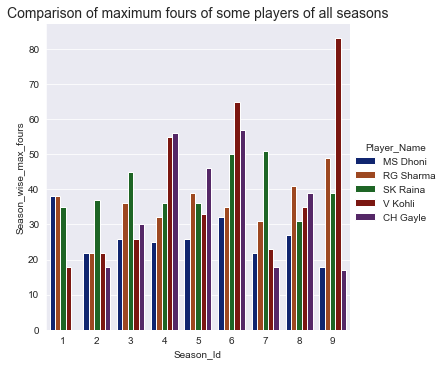

In [4]:
#max fours

data['Batsman_Scored']=data['Batsman_Scored'].astype(str)
four=data[data['Batsman_Scored'] == '4']
a=four.groupby('Striker_Id')['Batsman_Scored'].count()
b=pd.DataFrame({'Player_Id': a.index, 'Max_fours':a.values})
b.sort_values(by='Max_fours',ascending=False)
max_fours=b.merge(data1,on='Player_Id')
max_fours=max_fours.loc[:,['Player_Name','Max_fours']].sort_values(by='Max_fours',ascending=False).head(30)

print('\n\n<---------------------------Top 30 players with maximum number of fours of all season-------------------->\n\n')
print(max_fours)

plt.figure(figsize=(6.89,5.5))
plt.title('Players vs max_fours',fontsize=16)
sns.barplot(x='Player_Name', y='Max_fours', data=max_fours,palette='dark')
plt.xticks(rotation=90)


#<------------------------------------season wise max fours----------------------------------------->

fours=data.loc[(data['Batsman_Scored'] == '4'),('Match_Id','Striker_Id','Batsman_Scored')]
season=data2.loc[:,('Match_Id','Season_Id')]
fours=fours.merge(season,on='Match_Id')
fours=fours.groupby(['Season_Id','Striker_Id'])['Batsman_Scored'].count().reset_index()
player=data1.loc[:,('Player_Id','Player_Name')].rename(columns={'Player_Id':'Striker_Id'})
fours=fours.merge(player,on='Striker_Id').rename(columns={'Batsman_Scored':'Season_wise_max_fours'})
fours=fours.sort_values(by=['Season_Id','Season_wise_max_fours'],ascending=[True,False]).drop('Striker_Id',axis=1)
fours=fours.loc[(fours.Player_Name=='SK Raina') | (fours.Player_Name=='MS Dhoni') | (fours.Player_Name=='V Kohli') | (fours.Player_Name=='RG Sharma') | (fours.Player_Name=='CH Gayle'),:]

print('\n\n<--------------------Comparison of maximum fours of some players of all seasons------------------------>\n\n')
print(fours)
grid=sns.catplot(x="Season_Id", y="Season_wise_max_fours",kind='bar',hue="Player_Name",data=fours,palette='dark')
plt.title('Comparison of maximum fours of some players of all seasons',fontsize=14)





<---------------------------Top 30 players with maximum number of Sixes of all season-------------------->


       Player_Name  Max_sixes
0         CH Gayle        252
1        RG Sharma        164
2         SK Raina        161
3          V Kohli        148
4        YK Pathan        143
5   AB de Villiers        142
6         MS Dhoni        140
7        DA Warner        134
8     Yuvraj Singh        133
9       KA Pollard        125
10       SR Watson        121
11        DR Smith        109
12     BB McCullum        106
13        V Sehwag        106
14      RV Uthappa        104
15    AC Gilchrist         92
16         M Vijay         89
17       JP Duminy         78
19       AT Rayudu         76
18         NV Ojha         76
20       DA Miller         74
21        SE Marsh         73
22        S Dhawan         62
23      KD Karthik         60
24       DJ Hussey         60
25      GJ Maxwell         56
26       JA Morkel         55
28       RA Jadeja         53
27       MK Pandey 

Text(0.5, 1.0, 'Comparison of maximum Sixes of some players of all seasons')

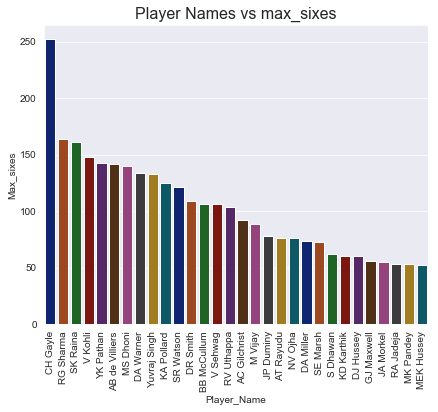

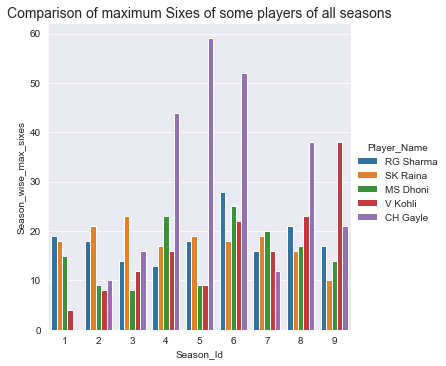

In [5]:
#<-----------------------------------------max_sixes--------------------------------------------------->

ball2=pd.DataFrame(data)
six=ball2[ball2['Batsman_Scored'] == '6']
c=six.groupby('Striker_Id')['Batsman_Scored'].count().reset_index()
b=c.sort_values(by='Batsman_Scored',ascending=False).rename(columns={'Batsman_Scored':'Max_sixes',
                                                                     'Striker_Id':'Player_Id'})
max_sixes=b.merge(data1,on='Player_Id')
max_sixes=max_sixes.loc[:,['Player_Name','Max_sixes']].sort_values(by='Max_sixes',ascending=False).head(30)
print('\n\n<---------------------------Top 30 players with maximum number of Sixes of all season-------------------->\n\n')
print(max_sixes)

plt.figure(figsize=(6.89,5.5))
plt.title('Player Names vs max_sixes',fontsize=16)
sns.barplot(x='Player_Name', y='Max_sixes', data=max_sixes,palette='dark')
plt.xticks(rotation=90)

#<---------------------------------------season wise max sixes------------------------------------------->

s_six=data.loc[:,('Match_Id','Striker_Id','Batsman_Scored')]
s_six=ball2[ball2['Batsman_Scored'] == '6']
season=data2.loc[:,('Match_Id','Season_Id')]
s_six=s_six.merge(season,on='Match_Id')
season_six=s_six.groupby(['Season_Id','Striker_Id'])['Batsman_Scored'].count().reset_index()
player=data1.loc[:,('Player_Id','Player_Name')].rename(columns={'Player_Id':'Striker_Id'})
season_six=season_six.merge(player,on='Striker_Id').rename(columns={'Batsman_Scored':'Season_wise_max_sixes'})
season_six=season_six.sort_values(by=['Season_Id','Season_wise_max_sixes'],ascending=[True,False]).drop('Striker_Id',axis=1)
season_six=season_six.loc[(season_six.Player_Name=='SK Raina') | (season_six.Player_Name=='MS Dhoni') | (season_six.Player_Name=='V Kohli') | (season_six.Player_Name=='RG Sharma') | (season_six.Player_Name=='CH Gayle'),:]

print('\n\n<--------------------Comparison of maximum Sixes of some players of all seasons------------------------>\n\n')
print(season_six)

grid=sns.catplot(x="Season_Id", y="Season_wise_max_sixes",kind='bar',hue="Player_Name",data=season_six)
plt.title('Comparison of maximum Sixes of some players of all seasons',fontsize=14)





<--------------------------Number of matches in each stadium in all seasons----------------------->

 
                                           Venue_Name  Total_matches
0                               M Chinnaswamy Stadium             58
1                                        Eden Gardens             54
2                                    Feroz Shah Kotla             53
3                                    Wankhede Stadium             49
4                     MA Chidambaram Stadium, Chepauk             48
5           Rajiv Gandhi International Stadium, Uppal             41
6          Punjab Cricket Association Stadium, Mohali             35
7                              Sawai Mansingh Stadium             33
8                          Dr DY Patil Sports Academy             17
9                          Subrata Roy Sahara Stadium             17
10                                          Kingsmead             15
11                       Sardar Patel Stadium, Motera             1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

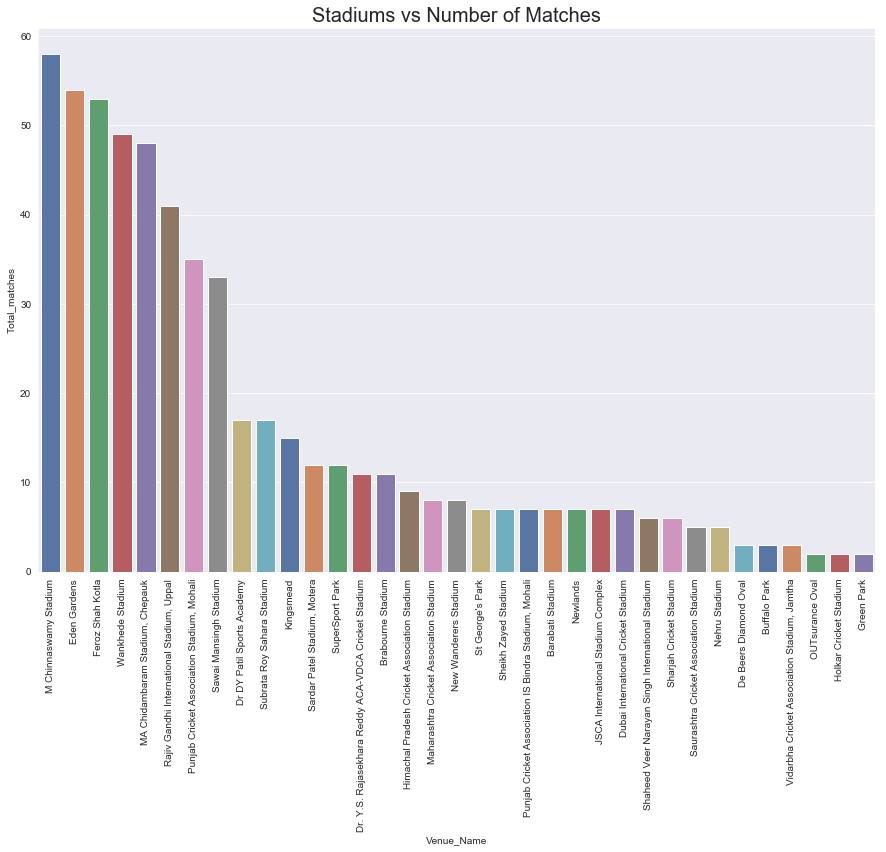

In [6]:
#matches in each stadium

vnu=data2.groupby('Venue_Name')
venue=vnu['Match_Id'].count()
most_matches=pd.DataFrame(venue)
most_matches=most_matches.sort_values(by='Match_Id',
                    ascending=False).reset_index().rename(columns={'Match_Id':'Total_matches'})


print('\n\n<--------------------------Number of matches in each stadium in all seasons----------------------->\n\n ')
print(most_matches)



plt.figure(figsize=(15,10))
plt.title('Stadiums vs Number of Matches',fontsize=20)
sns.barplot(x="Venue_Name", y="Total_matches",palette="deep",data=most_matches)
plt.xticks(rotation=90)




<------------------------LIST OF PLAYERS WITH MAXIMUM NUMBER OF MAN OF THE MATCH AWARDS------------------------>


       Player_Name  most_man_of_the_match_awards
90        CH Gayle                            17
21       YK Pathan                            16
67  AB de Villiers                            15
98       DA Warner                            14
36       RG Sharma                            13
14        SK Raina                            13
12      MEK Hussey                            12
26       G Gambhir                            12
13        MS Dhoni                            12
52       AM Rahane                            12


<------------------------COMPARISON OF SOME PLAYERS WITH MAXIMUM NUMBER OF MAN OF THE MATCH AWARDS------------------------>


    Player_Name  Man_of_the_match_awards  Season_Year
21     MS Dhoni                        2         2008
29     SK Raina                        1         2008
48     CH Gayle                        1         2009


Text(0.5, 1.0, 'COMPARISON OF SOME PLAYERS WITH MAXIMUM NUMBER OF MAN OF THE MATCH AWARDS IN EACH SEASON')

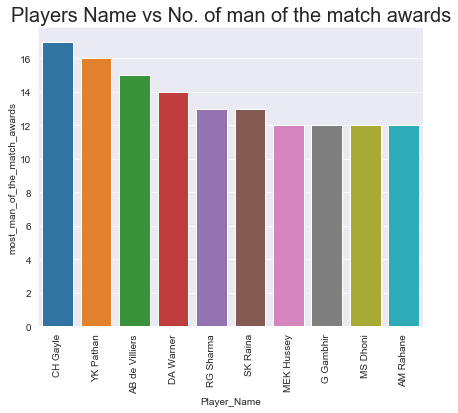

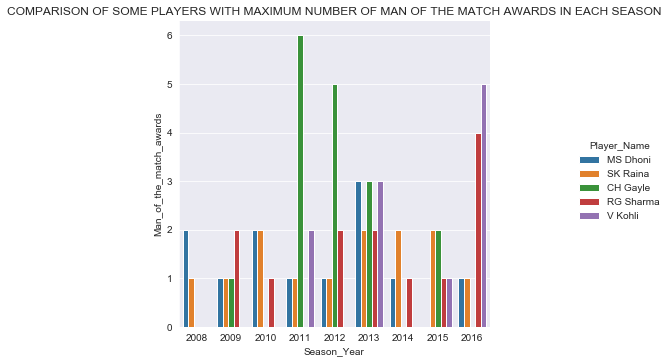

In [7]:
#<-----------------------------------man of the match-------------------------------------------->

data2['Man_Of_The_Match_Id']=data2['Man_Of_The_Match_Id'].astype(str).astype(float)
a=data2.loc[:,('Match_Id','Man_Of_The_Match_Id')]
data1['Player_Id']=data1['Player_Id'].astype(float)
b=data1.loc[:,('Player_Id','Player_Name')]
c=b.rename(index=str,columns={'Player_Id':'Man_Of_The_Match_Id'})
d=a.merge(c,on='Man_Of_The_Match_Id')
e=d.sort_values(by='Man_Of_The_Match_Id')
l=e.groupby('Man_Of_The_Match_Id')['Player_Name'].count()
f=c.merge(l,on='Man_Of_The_Match_Id')
h=f.rename(columns={'Player_Name_x':'Player_Name','Player_Name_y':'most_man_of_the_match_awards'})
h=h.sort_values(by='most_man_of_the_match_awards',ascending=False).head(10).drop('Man_Of_The_Match_Id',axis=1)

print('\n\n<------------------------LIST OF PLAYERS WITH MAXIMUM NUMBER OF MAN OF THE MATCH AWARDS------------------------>\n\n')
print(h)

plt.figure(figsize=(6.89,5.5))
plt.title('Players Name vs No. of man of the match awards',fontsize=20)
sns.barplot(x='Player_Name', y="most_man_of_the_match_awards", data=h)
plt.xticks(rotation=90)


#<------------------------------------most man of the match in each season--------------------------------->

season=data4.loc[:,('Season_Id','Season_Year')]
data2['Man_Of_The_Match_Id']=data2['Man_Of_The_Match_Id'].astype(str).astype(float)
a=data2.loc[:,('Match_Id','Man_Of_The_Match_Id','Season_Id')]
data1['Player_Id']=data1['Player_Id'].astype(float)
b=data1.loc[:,('Player_Id','Player_Name')]
c=b.rename(index=str,columns={'Player_Id':'Man_Of_The_Match_Id'})
e=a.merge(c,on='Man_Of_The_Match_Id')
e=e.groupby(['Season_Id','Player_Name'])['Man_Of_The_Match_Id'].count().reset_index().rename(columns={'Man_Of_The_Match_Id':'Man_of_the_match_awards'}).merge(season,on='Season_Id').drop('Season_Id',axis=1)

season_mom=e.loc[(e.Player_Name=='SK Raina') | (e.Player_Name=='MS Dhoni') | (e.Player_Name=='V Kohli') | (e.Player_Name=='RG Sharma') | (e.Player_Name=='CH Gayle'),:]
print('\n\n<------------------------COMPARISON OF SOME PLAYERS WITH MAXIMUM NUMBER OF MAN OF THE MATCH AWARDS------------------------>\n\n')
print(season_mom)


Grid=sns.catplot(x="Season_Year", y="Man_of_the_match_awards",kind='bar',hue="Player_Name",data=season_mom)
plt.title('COMPARISON OF SOME PLAYERS WITH MAXIMUM NUMBER OF MAN OF THE MATCH AWARDS IN EACH SEASON',fontsize=12)

<-----------------------------------SEASON WISE PURPLE CAP WINNER--------------------------------->
     Player_Name  Season_Year
3  Sohail Tanvir         2008
0       RP Singh         2009
4        PP Ojha         2010
6     SL Malinga         2011
5       M Morkel         2012
1       DJ Bravo         2013
8      MM Sharma         2014
2       DJ Bravo         2015
7        B Kumar         2016


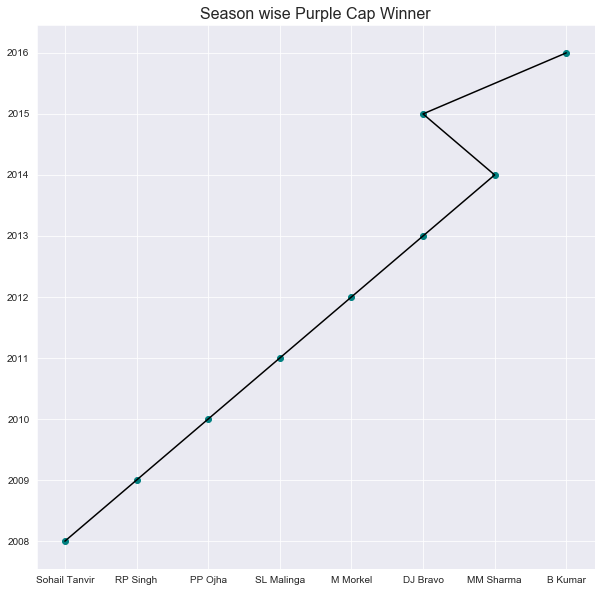

In [8]:
#<-----------------------------------purple cap---------------------------------------->

pcap=data4.loc[:,('Season_Year','Purple_Cap_Id')]
plyr=data1.loc[:,('Player_Id','Player_Name')]
nw_plyr=plyr.rename(columns={'Player_Id':'Purple_Cap_Id'})
purplecap=nw_plyr.merge(pcap,on='Purple_Cap_Id')
purplecap=purplecap.loc[:,('Player_Name','Season_Year')].sort_values(by='Season_Year')
print('<-----------------------------------SEASON WISE PURPLE CAP WINNER--------------------------------->')
print(purplecap)

plt.figure(figsize=(10,10))
plt.title('Season wise Purple Cap Winner',fontsize=16)
plt.plot(purplecap['Player_Name'], purplecap["Season_Year"],color='k')
plt.scatter(purplecap['Player_Name'], purplecap["Season_Year"],color='teal')



<-----------------------------------SEASON WISE ORANGE CAP WINNER--------------------------------->
    Player_Name  Season_Year
4      SE Marsh         2008
1     ML Hayden         2009
5  SR Tendulkar         2010
6      CH Gayle         2011
7      CH Gayle         2012
2    MEK Hussey         2013
3    RV Uthappa         2014
8     DA Warner         2015
0       V Kohli         2016


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

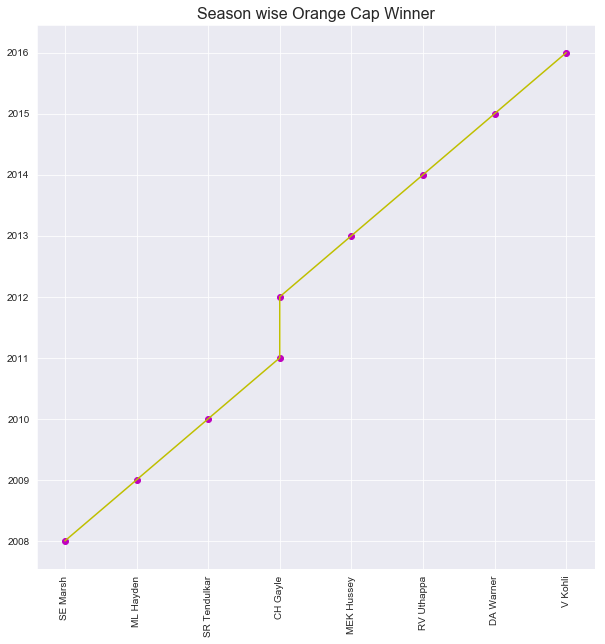

In [9]:
#<-------------------------------------------orange cap------------------------------------------------>

ocap=data4.loc[:,('Season_Year','Orange_Cap_Id')]
plyr1=data1.loc[:,('Player_Id','Player_Name')]
nw_plyr=plyr1.rename(columns={'Player_Id':'Orange_Cap_Id'})
orangecap=nw_plyr.merge(ocap,on='Orange_Cap_Id')
orangecap=orangecap.loc[:,('Player_Name','Season_Year')].sort_values(by='Season_Year')
print('<-----------------------------------SEASON WISE ORANGE CAP WINNER--------------------------------->')
print(orangecap)

plt.figure(figsize=(10,10))
plt.title('Season wise Orange Cap Winner',fontsize=16)
plt.plot(orangecap['Player_Name'], orangecap["Season_Year"],color='y')
plt.scatter(orangecap['Player_Name'], orangecap["Season_Year"],color='m')
plt.xticks(rotation=90)

<-------------------------MAN OF THE SERIES WINNER OF ALL SEASONS--------------------------->
    Player_Name  Season_Year
1     SR Watson         2008
3  AC Gilchrist         2009
4  SR Tendulkar         2010
5      CH Gayle         2011
7     SP Narine         2012
2     SR Watson         2013
6    GJ Maxwell         2014
8    AD Russell         2015
0       V Kohli         2016


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

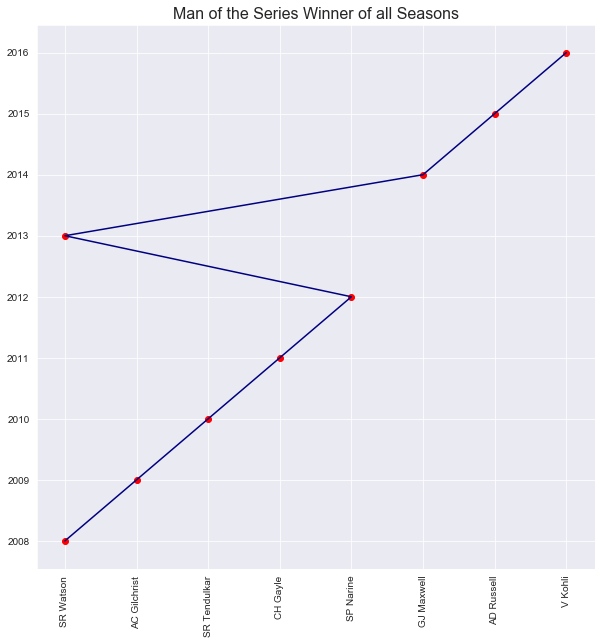

In [10]:
#<-------------------------------------------man of the series------------------------------------------->

mos=data4.loc[:,('Season_Year','Man_of_the_Series_Id')]
plyr2=data1.loc[:,('Player_Id','Player_Name')]
nw_plyr1=plyr2.rename(columns={'Player_Id':'Man_of_the_Series_Id'})
man_of_series=nw_plyr1.merge(mos,on='Man_of_the_Series_Id')
man_of_series=man_of_series.loc[:,('Player_Name','Season_Year')].sort_values(by='Season_Year')
print('<-------------------------MAN OF THE SERIES WINNER OF ALL SEASONS--------------------------->')
print(man_of_series)

plt.figure(figsize=(10,10))
plt.title('Man of the Series Winner of all Seasons',fontsize=16)
plt.plot(man_of_series['Player_Name'], man_of_series["Season_Year"],color='navy')
plt.scatter(man_of_series['Player_Name'], man_of_series["Season_Year"],color='red')
plt.xticks(rotation=90)


In [11]:
#<-------------------------team match winnners and man of the match------------------------------------->

mom=data2.loc[:,('Match_Date','Match_Id','Team_Name_Id','Opponent_Team_Id','Toss_Winner_Id','Win_Type','Won_By','Match_Winner_Id','Man_Of_The_Match_Id')]
plr=data1.loc[:,('Player_Id','Player_Name')]
plr=plr.rename(columns={'Player_Id':'Man_Of_The_Match_Id'})
mom=plr.merge(mom,on='Man_Of_The_Match_Id')
team_name=data5.loc[:,('Team_Id','Team_Short_Code')].rename(columns={'Team_Id':'Team_Name_Id'})
mom=team_name.merge(mom,on='Team_Name_Id')
team_name=team_name.rename(columns={'Team_Name_Id':'Opponent_Team_Id'})
mom=team_name.merge(mom,on='Opponent_Team_Id').drop(['Opponent_Team_Id','Team_Name_Id'
,'Man_Of_The_Match_Id'],axis=1).rename(columns={'Team_Short_Code_x':'Team_1',
    'Team_Short_Code_y':'Opposite_team','Player_Name':'Man_of_the_match'})
team_name=team_name.rename(columns={'Opponent_Team_Id':'Toss_Winner_Id'})
mom=team_name.merge(mom,on='Toss_Winner_Id').rename(columns={'Team_Short_Code':'Toss_winner_Team'})
team_name=team_name.rename(columns={'Toss_Winner_Id':'Match_Winner_Id'})
mom=team_name.merge(mom,on='Match_Winner_Id').rename(columns={'Team_Short_Code':'Winning_team'}).drop(['Match_Winner_Id'
                                                        ,'Toss_Winner_Id'],axis=1).sort_values(by='Match_Id')

teams=mom[['Match_Id','Match_Date','Team_1','Opposite_team','Toss_winner_Team',
           'Winning_team','Win_Type','Won_By','Man_of_the_match']]
print('\n\n<-----------------------------Teams Matches and Winners with Man of the Match--------------------------->\n\n')
print(teams)



<-----------------------------Teams Matches and Winners with Man of the Match--------------------------->


     Match_Id Match_Date Team_1 Opposite_team Toss_winner_Team Winning_team  \
38     335987  18-Apr-08    KKR           RCB              RCB          KKR   
160    335988  19-Apr-08    CSK          KXIP              CSK          CSK   
356    335989  19-Apr-08     RR            DD               RR           DD   
120    335990  20-Apr-08    RCB            MI               MI          RCB   
62     335991  20-Apr-08     DC           KKR               DC          KKR   
288    335992  21-Apr-08   KXIP            RR             KXIP           RR   
392    335993  22-Apr-08     DD            DC               DC           DD   
205    335994  23-Apr-08     MI           CSK               MI          CSK   
315    335995  24-Apr-08     RR            DC               RR           RR   
269    335996  25-Apr-08     MI          KXIP               MI         KXIP   
304    335997  26-Apr

<---------------------------SEASON WISE WINNERS OF ALL SEASONS----------------------------->
  Team_name  Season_Year
0        RR         2008
1        DC         2009
2       CSK         2010
3       CSK         2011
4       KKR         2012
5        MI         2013
6       KKR         2014
7        MI         2015
8       SRH         2016


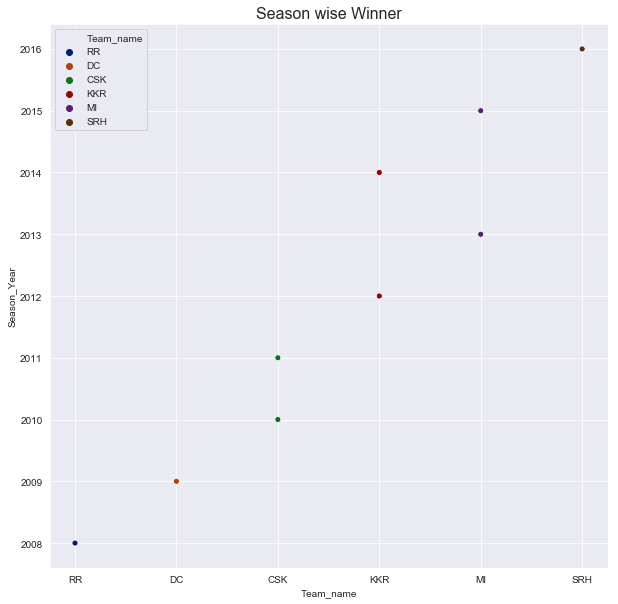

In [104]:
#<---------------------------------Season Wise Winner------------------------------------->

season=data4.loc[:,('Season_Id','Season_Year')]
ssn=data2.loc[:,('Season_Id','Match_Winner_Id')]
winner=ssn.groupby('Season_Id').tail(1)
teams=data5.loc[:,('Team_Id','Team_Short_Code')]
teams=teams.rename(columns={'Team_Id':'Match_Winner_Id','Team_Short_Code':'Team_name'})
teams=teams.merge(winner,on='Match_Winner_Id')
teams=teams.sort_values(by='Season_Id').drop('Match_Winner_Id',axis=1).merge(season,
                                                        on='Season_Id').drop('Season_Id',axis=1)
print('<---------------------------SEASON WISE WINNERS OF ALL SEASONS----------------------------->')
print(teams)
plt.figure(figsize=(10,10))
plt.title('Season wise Winner', fontsize=16)
#sns.lineplot(teams['Team_name'], teams["Season_Year"],color='olive',data=teams)
sns.scatterplot(teams['Team_name'], teams["Season_Year"],hue='Team_name',data=teams,palette='dark')


,Player_Name,Matches,Total_runs,Average,Sixes,Fours,Highest_runs
18,SK Raina,143,4106,29.0,161,360,100
7,V Kohli,131,4105,31.0,148,360,113
50,RG Sharma,137,3874,28.0,164,323,109
34,G Gambhir,130,3634,28.0,51,422,93
119,CH Gayle,91,3447,38.0,252,281,175
40,RV Uthappa,130,3390,26.0,104,341,83
133,DA Warner,100,3373,34.0,134,338,109
17,MS Dhoni,128,3270,26.0,140,236,70
93,AB de Villiers,109,3270,30.0,142,275,133
36,S Dhawan,112,3082,28.0,62,348,95


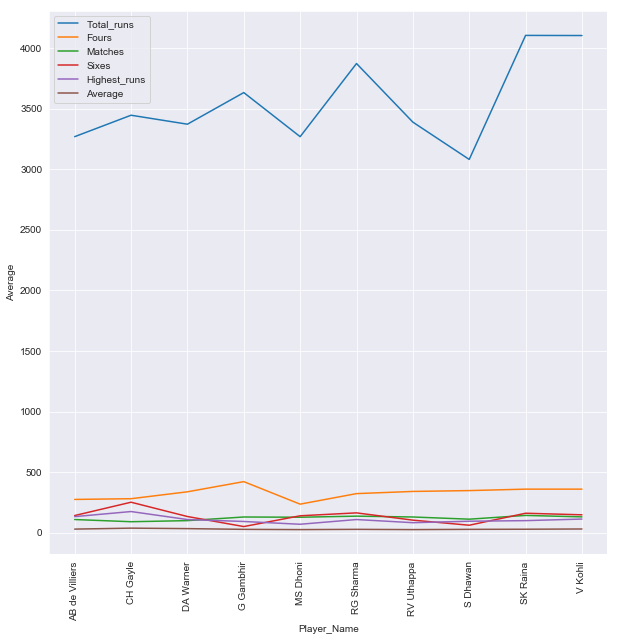

In [13]:
#<----------------------------------top 10 players of all seasons------------------------------------->

data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
run=data.groupby(['Striker_Id'])
run1=run['Batsman_Scored'].sum().sort_values()
runs=pd.DataFrame(run1)
runs.sort_values(by='Batsman_Scored',ascending=False)
batsman=data1.rename(index=str,columns={'Player_Id':'Striker_Id'})
batsman=batsman.drop(['Is_Umpire','Unnamed: 7'],axis=1)
batsman_name=runs.merge(batsman,on='Striker_Id')
batsman_name=batsman_name.loc[:,['Striker_Id','Player_Name','Batsman_Scored']].sort_values(by='Striker_Id')
matches=data.loc[:,('Match_Id','Striker_Id')]
matches=matches.groupby('Striker_Id')['Match_Id'].unique() 

#<--------------------------------------Matches------------------------------------------>

l=[]
for i in range(len(matches.values)):
    a=matches.values[i]
    l.append(a.size)
batsman_name['Matches'] = l    
batsman_name['Average']= round(batsman_name['Batsman_Scored'] / batsman_name['Matches'])

#<-------------------------------------sixes------------------------------------------------>

six=data[data['Batsman_Scored'] == 6]
six=six.groupby('Striker_Id')['Batsman_Scored'].count().reset_index()
Top_10=six.merge(batsman_name,on='Striker_Id').rename(columns={'Batsman_Scored_x':'Sixes'})

#<---------------------------------------fours------------------------------------------------>

fours=data[data['Batsman_Scored'] == 4]
fours=fours.groupby('Striker_Id')['Batsman_Scored'].count().reset_index()
Top_10=fours.merge(Top_10,on='Striker_Id').rename(columns={'Batsman_Scored':'Fours','Batsman_Scored_y':'Total_runs'})

#<--------------------------------------------Highest runs-------------------------------------->

data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
h_score=data.loc[:,('Match_Id','Striker_Id','Batsman_Scored')]
highest_runs=h_score.groupby(['Match_Id','Striker_Id'])['Batsman_Scored'].sum().reset_index()
highest_runs=highest_runs.drop('Match_Id',axis=1)
highest_runs=highest_runs.sort_values(by='Batsman_Scored',ascending=False)
highest_runs=highest_runs.drop_duplicates(subset='Striker_Id',keep='first')
Top_10=Top_10.merge(highest_runs,on='Striker_Id').rename(columns={'Batsman_Scored_x':'Total_runs',
                                'Batsman_Scored_y':'Highest_runs','Batsman_Scored':'Highest_runs'})
Top_10=Top_10.sort_values(by='Total_runs',ascending=False).head(10).drop('Striker_Id',axis=1)
Top_10=Top_10[['Player_Name','Matches','Total_runs','Average','Sixes','Fours','Highest_runs']]


plt.figure(figsize=(10,10))
sns.lineplot(x="Player_Name", y="Total_runs",data=Top_10)
sns.lineplot(x="Player_Name", y="Fours",data=Top_10)
sns.lineplot(x="Player_Name", y="Matches",data=Top_10)
sns.lineplot(x="Player_Name", y="Sixes",data=Top_10)
sns.lineplot(x="Player_Name", y="Highest_runs",data=Top_10)
sns.lineplot(x="Player_Name", y="Average",data=Top_10)
plt.xticks(rotation=90)
plt.legend(['Total_runs','Fours','Matches','Sixes','Highest_runs','Average'])
Top_10

#sns.pairplot(data=Top_10)



<--------------------------TOP_10 BOWLERS WITH MAX SCORES GET----------------------------->


     Bowler_Id      Player_Name  Max_score_get
29        50.0  Harbhajan Singh           2742
8         14.0          P Kumar           2529
41        67.0        PP Chawla           2472
87       136.0         A Mishra           2466
132      194.0       SL Malinga           2407
137      201.0         R Ashwin           2359
62        94.0         DW Steyn           2159
51        81.0    R Vinay Kumar           2141
44        71.0         DJ Bravo           2110
16        29.0        IK Pathan           2101


<-------------------------BOTTOM_10 BOWLERS WITH MAX SCORES GET------------------------------>


     Bowler_Id    Player_Name  Max_score_get
31        53.0   AC Gilchrist              1
206      306.0      SPD Smith              2
275      396.0  KS Williamson              6
71       111.0      LPC Silva              6
297      431.0         N Rana              6
146      219.0    

Text(0.5, 1.0, 'Bottom 10 Bowlers with maximum scores get')

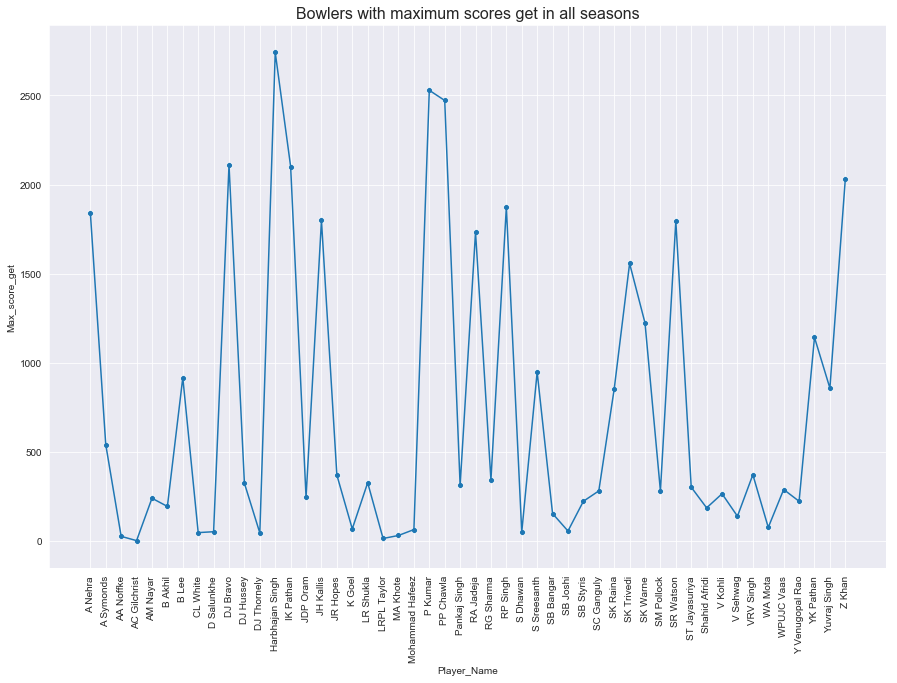

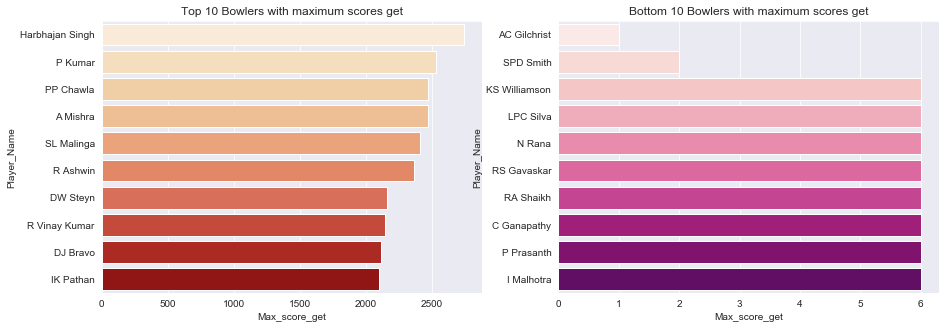

In [14]:
#<---------------------------total no of scores get by a bowler in all seasons--------------------------------->

max_score=data.groupby('Bowler_Id')['Batsman_Scored'].count()
max_score=pd.DataFrame(max_score)
nw_plyr=plyr.rename(columns={'Player_Id':'Bowler_Id'})
max_score_bowler=nw_plyr.merge(max_score, on='Bowler_Id')
max_score_bowler=max_score_bowler.rename(columns={'Batsman_Scored':'Max_score_get'})

print('\n\n<--------------------------TOP_10 BOWLERS WITH MAX SCORES GET----------------------------->\n\n')
Top10_max_score_bowler=max_score_bowler.sort_values(by='Max_score_get',ascending=False).head(10)
print(Top10_max_score_bowler)

print('\n\n<-------------------------BOTTOM_10 BOWLERS WITH MAX SCORES GET------------------------------>\n\n')
Bt10_max_score_bowler=max_score_bowler.sort_values(by='Max_score_get',ascending=True).head(10)
print(Bt10_max_score_bowler)

print('\n\n<-------------------------TOTAL NUMBER OF SCORES GET BY ANY BOWLER------------------------------>\n\n')
max_score_bowler=max_score_bowler.drop('Bowler_Id',axis=1).head(50)
print(max_score_bowler)

plt.figure(figsize=(15,10))
plt.title('Bowlers with maximum scores get in all seasons',fontsize=16)
sns.lineplot(max_score_bowler['Player_Name'], max_score_bowler["Max_score_get"])
sns.scatterplot(max_score_bowler['Player_Name'], max_score_bowler["Max_score_get"])
plt.xticks(rotation=90)


f,axes=plt.subplots(1,2,figsize=(15,5))

y=Top10_max_score_bowler['Player_Name']
x=Top10_max_score_bowler['Max_score_get']

y1=Bt10_max_score_bowler['Player_Name']
x1=Bt10_max_score_bowler['Max_score_get']

sns.barplot(x,y,data=Top10_max_score_bowler,ax=axes[0],palette='OrRd')
axes[0].set_title('Top 10 Bowlers with maximum scores get')
sns.barplot(x1,y1,data=Bt10_max_score_bowler,ax=axes[1],palette='RdPu')
axes[1].set_title('Bottom 10 Bowlers with maximum scores get')




<---------------------------Players with maximum numbers of Dot balls played----------------------------->


      Player_Name  Most_dot_balls
7         V Kohli            1193
39      G Gambhir            1167
45     RV Uthappa            1090
159      CH Gayle            1089
56      RG Sharma            1082
20       SK Raina            1081
41       S Dhawan            1077
8       JH Kallis             982
184     DA Warner             950
182       M Vijay             930
1     BB McCullum             893
84      AM Rahane             882
132  SR Tendulkar             875
26   Yuvraj Singh             822
5        R Dravid             820
16       PA Patel             811
19       MS Dhoni             810
31      SR Watson             787
87     KD Karthik             783
145      DR Smith             771


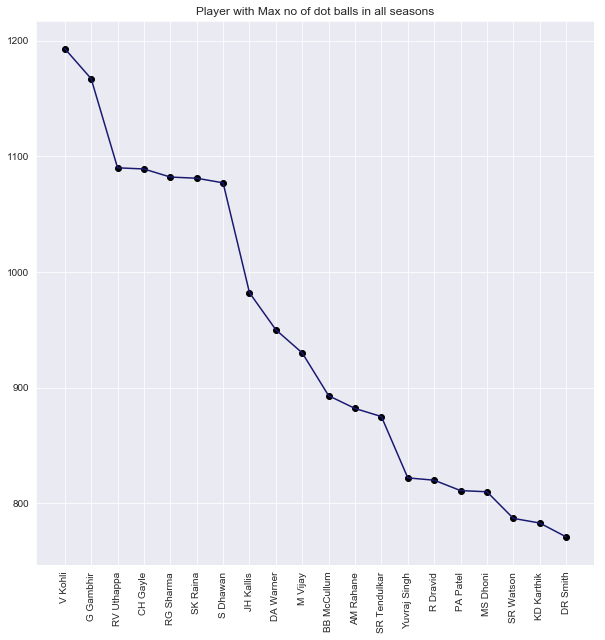

In [15]:
#<--------------------------total no of dot balls by players in all seasons--------------------------------------->

zeros=data[(data.Batsman_Scored==0)]
zeros=zeros.groupby('Striker_Id')['Batsman_Scored'].count()
max_zero=pd.DataFrame(zeros)
max_zero=max_zero.sort_values(by='Batsman_Scored',ascending=False)
player_name=data1.loc[:,('Player_Id','Player_Name')]
player_name=player_name.rename(columns={'Player_Id':'Striker_Id'})
player_name1=player_name.merge(max_zero,on='Striker_Id').sort_values(by='Batsman_Scored',ascending=False)
player_name1=player_name1.drop('Striker_Id',axis=1).head(20).rename(columns={'Batsman_Scored':'Most_dot_balls'})

plt.figure(figsize=(10,10))
plt.title('Player with Max no of dot balls in all seasons')
plt.plot(player_name1['Player_Name'], player_name1["Most_dot_balls"],color='midnightblue')
plt.scatter(player_name1['Player_Name'], player_name1["Most_dot_balls"],color='k')
plt.xticks(rotation=90)
print('\n\n<---------------------------Players with maximum numbers of Dot balls played----------------------------->\n\n')
print(player_name1)

In [16]:
#<-----------------------------------------super over------------------------------------------------>

so=data2.loc[(data2.IS_Superover==1),('Match_Id','Match_Date','Season_Id','Team_Name_Id','Opponent_Team_Id','Match_Winner_Id','IS_Superover')]
tm=data5.loc[:,('Team_Id','Team_Short_Code')]
so1=so.rename(columns={'Team_Name_Id':'Team_Id'})
so1=so1.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
so1=so1.rename(columns={'Opponent_Team_Id':'Team_Id'})
so1=so1.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
team=so1.rename(columns={'Team_Short_Code_x':'Team 1','Team_Short_Code_y':'opp_team','Match_Winner_Id':'Team_Id'})
Super_over=team.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
Super_over=Super_over[['Season_Id','Match_Id','IS_Superover','Match_Date','Team 1','opp_team','Team_Short_Code']].sort_values(by='Season_Id')
Super_over=Super_over.rename(columns={'Team_Short_Code':'Winning_team'}).drop(['IS_Superover','Match_Id'],axis=1)
    
print('\n\n<-------------------------Super Overs In all Seasons--------------------------->\n\n')
print(Super_over)




<-------------------------Super Overs In all Seasons--------------------------->


   Season_Id Match_Date Team 1 opp_team Winning_team
0          2  23-Apr-09    KKR       RR           RR
2          3  21-Mar-10    CSK     KXIP         KXIP
4          6   7-Apr-13    SRH      RCB          SRH
5          6  16-Apr-13    RCB       DD          RCB
1          7  29-Apr-14    KKR       RR           RR
3          8  21-Apr-15     RR     KXIP         KXIP


In [17]:
#<------------------------------toss winning and match winning-----------------------------------------> 

toss=data2.loc[:,('Match_Id','Match_Date','Season_Id','Team_Name_Id','Opponent_Team_Id','Match_Winner_Id','Toss_Winner_Id')]
tm=data5.loc[:,('Team_Id','Team_Short_Code')]
toss1=toss.rename(columns={'Team_Name_Id':'Team_Id'})
toss1=toss1.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
toss1=toss1.rename(columns={'Opponent_Team_Id':'Team_Id'})
toss1=toss1.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
toss1=toss1.rename(columns={'Toss_Winner_Id':'Team_Id'})
toss2=toss1.rename(columns={'Team_Short_Code_x':'Team 1','Team_Short_Code_y':'opp_team'})
toss2=toss2.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
toss2=toss2.rename(columns={'Team_Short_Code':'Toss_winning_team'})
toss2=toss2.rename(columns={'Match_Winner_Id':'Team_Id'})
toss2=toss2.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
toss_winning_team=toss2.rename(columns={'Team_Short_Code':'Winning_team'})
toss_winning_team=toss_winning_team.sort_values(by='Match_Id').head(10).drop('Match_Id',axis=1)
print('\n\n<---------------------TOSS WINNING AND MATCH WINNING---------------------------->\n\n')
print(toss_winning_team)



<---------------------TOSS WINNING AND MATCH WINNING---------------------------->


    Match_Date  Season_Id Team 1 opp_team Toss_winning_team Winning_team
0    18-Apr-08          1    RCB      KKR               RCB          KKR
240  19-Apr-08          1   KXIP      CSK               CSK          CSK
467  19-Apr-08          1     DD       RR                RR           DD
116  20-Apr-08          1     MI      RCB                MI          RCB
58   20-Apr-08          1    KKR       DC                DC          KKR
147  21-Apr-08          1     RR     KXIP              KXIP           RR
469  22-Apr-08          1     DC       DD                DC           DD
218  23-Apr-08          1    CSK       MI                MI          CSK
172  24-Apr-08          1     DC       RR                RR           RR
325  25-Apr-08          1   KXIP       MI                MI         KXIP




<-------------------------------TOTAL WINS AS CAPTAIN------------------------------------>


         Player_Name  Total_wins_as_captain
8           MS Dhoni                     83
14         G Gambhir                     61
5            V Kohli                     37
20      AC Gilchrist                     35
22         RG Sharma                     34
13          SK Warne                     31
26      SR Tendulkar                     30
15          V Sehwag                     29
4           R Dravid                     22
11      Yuvraj Singh                     21
31         DA Warner                     18
0         SC Ganguly                     17
10     KC Sangakkara                     17
25          A Kumble                     15
33         GJ Bailey                     14
29        DL Vettori                     12
9           SK Raina                     10
18   Harbhajan Singh                     10
23  DPMD Jayawardene                     10
12         SR Watson     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

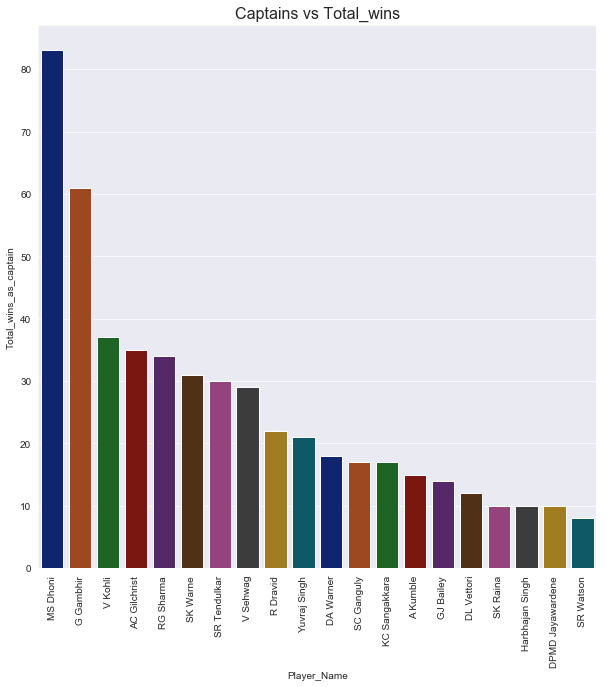

In [18]:
#<--------------------------------total_wins_as_captain------------------------------------------->

captain=data3.loc[(data3.Is_Captain== 1),('Match_Id','Player_Id','Is_Captain','Team_Id')]
t=data2.loc[:,('Match_Id','Season_Id','Team_Name_Id','Opponent_Team_Id','Match_Winner_Id')]
table=t.merge(captain, on='Match_Id')
table=table.loc[(table.Is_Captain == 1)]
table=table.loc[(table.Match_Winner_Id== table.Team_Id)]
table=table.groupby('Player_Id')['Match_Winner_Id'].count()
captain_win=pd.DataFrame(table)
c=data1.loc[:,('Player_Id','Player_Name')]
captain_win=c.merge(captain_win,on='Player_Id')
captain_win=captain_win.sort_values(by='Match_Winner_Id',ascending=False).head(20)
captain_win=captain_win.rename(columns={'Match_Winner_Id':'Total_wins_as_captain'}).drop('Player_Id',axis=1)
print('\n\n<-------------------------------TOTAL WINS AS CAPTAIN------------------------------------>\n\n')
print(captain_win)

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.barplot(x='Player_Name', y="Total_wins_as_captain", data=captain_win ,palette='dark')
plt.title('Captains vs Total_wins',fontsize=16)
plt.xticks(rotation=90)


<-----------------------------Total Matches in all Seasons----------------------------------->
   Total_Matches  Season_Year
0             58         2008
1             57         2009
2             60         2010
3             73         2011
4             74         2012
5             76         2013
6             60         2014
7             59         2015
8             60         2016


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

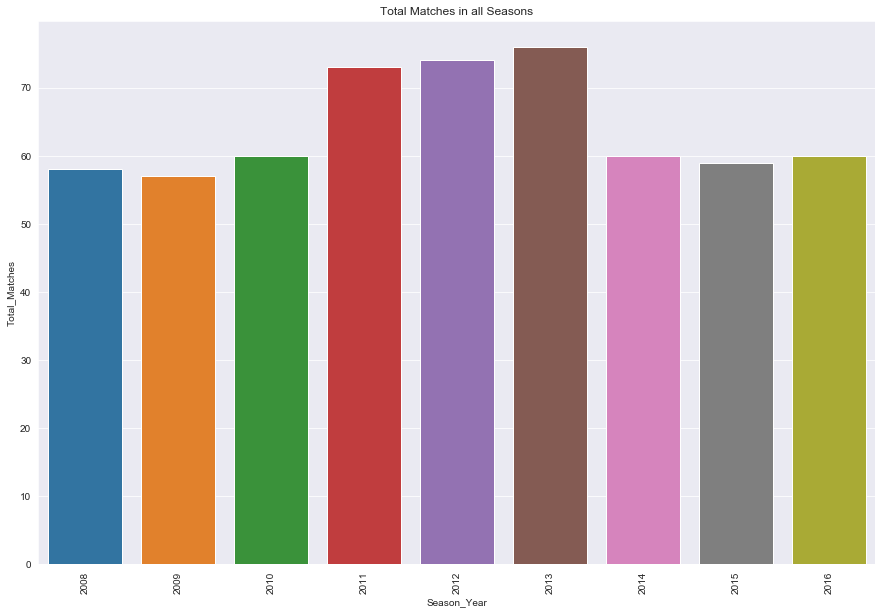

In [19]:
#<--------------------------total matches in all seasons----------------------------------------------->

season=data4.loc[:,('Season_Id','Season_Year')]
matches=data2.loc[:,('Season_Id','Match_Id')]
matches=matches.groupby('Season_Id')['Match_Id'].count()
s_matches=pd.DataFrame(matches).reset_index().rename(columns={'Match_Id':'Total_Matches'}).merge(season
                                                ,on='Season_Id').drop('Season_Id',axis=1)
print('<-----------------------------TOTAL MATCHES IN ALL SEASONS ----------------------------------->')
print(s_matches)


plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x='Season_Year', y="Total_Matches", data=s_matches)
plt.title('Total Matches in all Seasons')
plt.xticks(rotation=90)



<---------------------FIELDERS WITH MAXIMUM NUMBER OF CATCHES-------------------------->


          Player_Name  Max_Catches
81         KD Karthik           72
101    AB de Villiers           72
18           SK Raina           67
42         RV Uthappa           58
17           MS Dhoni           51
52          RG Sharma           47
14           PA Patel           47
163           NV Ojha           45
7             V Kohli           45
56            WP Saha           41
191        KA Pollard           41
38           S Dhawan           40
165           M Vijay           40
167         DA Warner           40
48       AC Gilchrist           40
182         AT Rayudu           39
264         DA Miller           38
131          DR Smith           37
23      KC Sangakkara           35
65           DJ Bravo           35
89          MK Pandey           34
31          RA Jadeja           34
28          YK Pathan           29
78          AM Rahane           27
281         SV Samson           

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

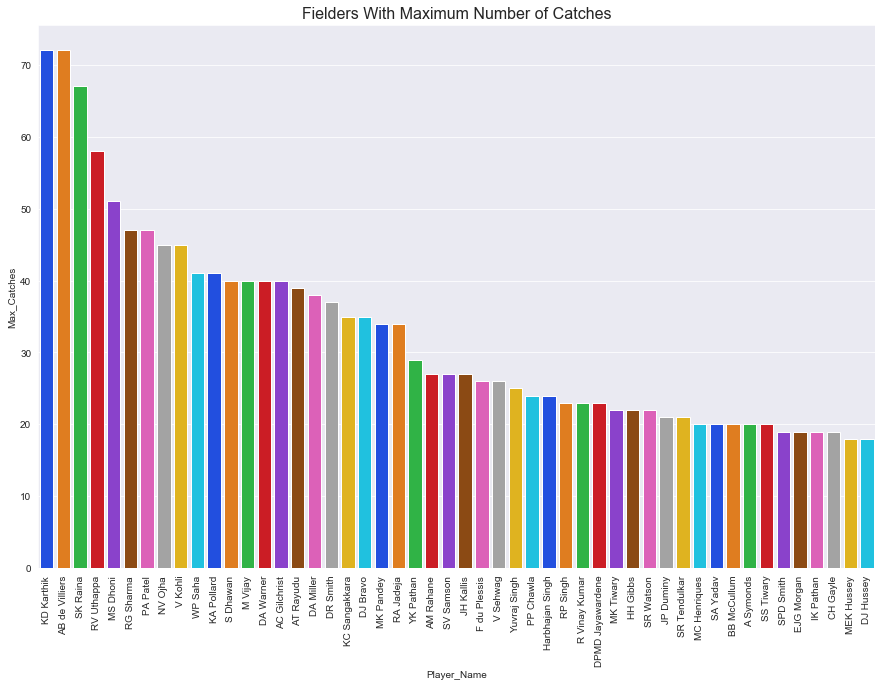

In [41]:
#<---------------------------------------------max catches------------------------------------------------>

catch=data.loc[data.Dissimal_Type=='caught',('Dissimal_Type','Fielder_Id')]
catch['Fielder_Id']=catch['Fielder_Id'].astype(str).astype(float)
catch=catch.groupby('Fielder_Id')['Dissimal_Type'].count()
plr=data1.loc[:,('Player_Id','Player_Name')]
plr = plr.rename (columns={'Player_Id':'Fielder_Id'})
catches=plr.merge(catch,on='Fielder_Id')
catches=catches.sort_values(by='Dissimal_Type',ascending=False).drop('Fielder_Id'
    ,axis=1).head(50).rename(columns={'Dissimal_Type':'Max_Catches'})

print('\n\n<---------------------FIELDERS WITH MAXIMUM NUMBER OF CATCHES-------------------------->\n\n')
print(catches)
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x='Player_Name', y="Max_Catches", data=catches,palette='bright')
plt.title('Fielders With Maximum Number of Catches',fontsize=16)
plt.xticks(rotation=90)



<------------------------KEEPER WITH MAXIMUM NUMBER OF CATCHES------------------------------->


        Keeper_Name  Total_Catches
12       KD Karthik             72
14   AB de Villiers             72
7        RV Uthappa             58
3          MS Dhoni             51
2          PA Patel             47
20          NV Ojha             45
10          WP Saha             41
9      AC Gilchrist             40
23        AT Rayudu             39
4     KC Sangakkara             35
31        SV Samson             27
0       BB McCullum             20
5           M Rawat             16
25        KM Jadhav             15
1        MV Boucher             14
15      YV Takawale             13
32         KL Rahul             11
24         MS Bisla             10
8           PR Shah             10
30  Gurkeerat Singh              8
17       SP Goswami              7
19       MN van Wyk              7
35       JC Buttler              7
26  KB Arun Karthik              6
29        DH Yagnik       

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

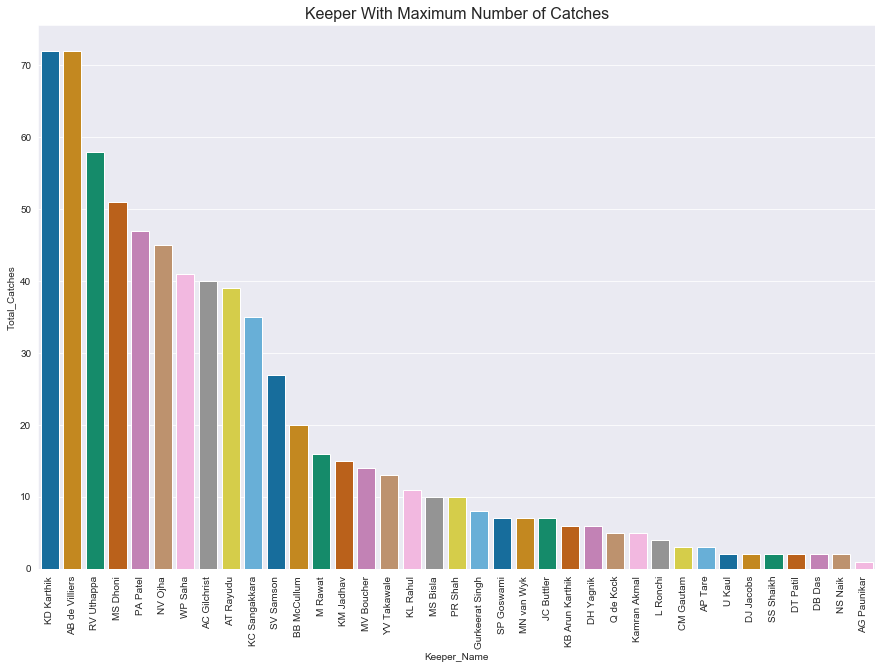

In [43]:
#<---------------------------------keeper with max no of catches--------------------------------------->

keeper=data3.loc[data3.Is_Keeper==1]['Player_Id'].unique()
keeper=pd.Series(keeper)
keeper=pd.DataFrame({'Player_Id':keeper.values})
player=data.loc[data.Dissimal_Type=='caught',('Dissimal_Type','Fielder_Id','Match_Id')]
player['Fielder_Id']=player['Fielder_Id'].astype(str).astype(float)
player=player.rename(columns={'Fielder_Id':'Player_Id'})
player=player.groupby('Player_Id')['Dissimal_Type'].count()
player=pd.DataFrame(player)
player=player.sort_values(by='Dissimal_Type',ascending=False)
plr=data1.loc[:,('Player_Id','Player_Name')]
keeper_name=plr.merge(player,on='Player_Id')
keeper_name=keeper_name.merge(keeper,on='Player_Id')
keeper_name=keeper_name.rename(columns={'Dissimal_Type':'Total_Catches','Player_Name':'Keeper_Name'})
total_catches=keeper_name.sort_values(by='Total_Catches',ascending=False).drop('Player_Id',axis=1)

print('\n\n<------------------------KEEPER WITH MAXIMUM NUMBER OF CATCHES------------------------------->\n\n')
print(total_catches)

plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x='Keeper_Name', y="Total_Catches", data=total_catches,palette='colorblind')
plt.title('Keeper With Maximum Number of Catches',fontsize=16)
plt.xticks(rotation=90)



<-------------------------TOTAL NUMBER OF BATTING AND FIELDING DECISIONS TAKEN------------------------------>


  Toss_Decision  count
0           bat    262
1         field    315


Text(0.5, 1.0, 'Batting vs fielding')

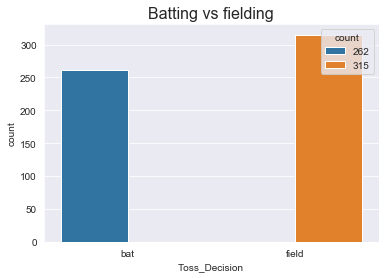

In [44]:
#<------------------------------total number of batting and fieling teams----------------------------->

a=data2.loc[:,('Team_Name_Id','Opponent_Team_Id','Match_Id'
               ,'Toss_Decision')]
a=a.groupby('Toss_Decision')['Match_Id'].count().reset_index().rename(columns={'Match_Id':'count'})

print('\n\n<-------------------------TOTAL NUMBER OF BATTING AND FIELDING DECISIONS TAKEN------------------------------>\n\n')
print(a)
sns.barplot(x="Toss_Decision", y="count", hue="count", data=a)
plt.title('Batting vs fielding',fontsize=16)


<----------------------Does Toss winning help in match winning--------------------------------->
   Toss_winning  count
0         False    286
1          True    291


Text(0.5, 1.0, 'Does Toss winning help in match winning?')

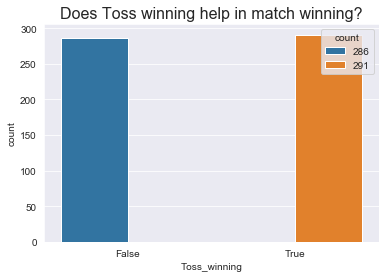

In [45]:
#<----------------------------toss winning help in match winning--------------------------------->

ss=data2['Toss_Winner_Id'] == data2['Match_Winner_Id']
ss=ss.groupby(ss).count().reset_index()
ss=ss.rename(columns={'index':'Toss_winning' ,0:'count'})
print('<----------------------Does Toss winning help in match winning--------------------------------->')
print(ss)
sns.barplot(x="Toss_winning", y="count", hue="count",data=ss)
plt.title('Does Toss winning help in match winning?',fontsize=16)



<---------------------------MOST WINS FOR A TEAM------------------------------------


   Team_name  Total_wins
6         MI          80
2        CSK          79
1        RCB          70
0        KKR          68
3       KXIP          63
4         RR          63
5         DD          56
10       SRH          34
7         DC          29
9         PW          12
12        GL           9
8        KTK           6
11       RPS           5


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

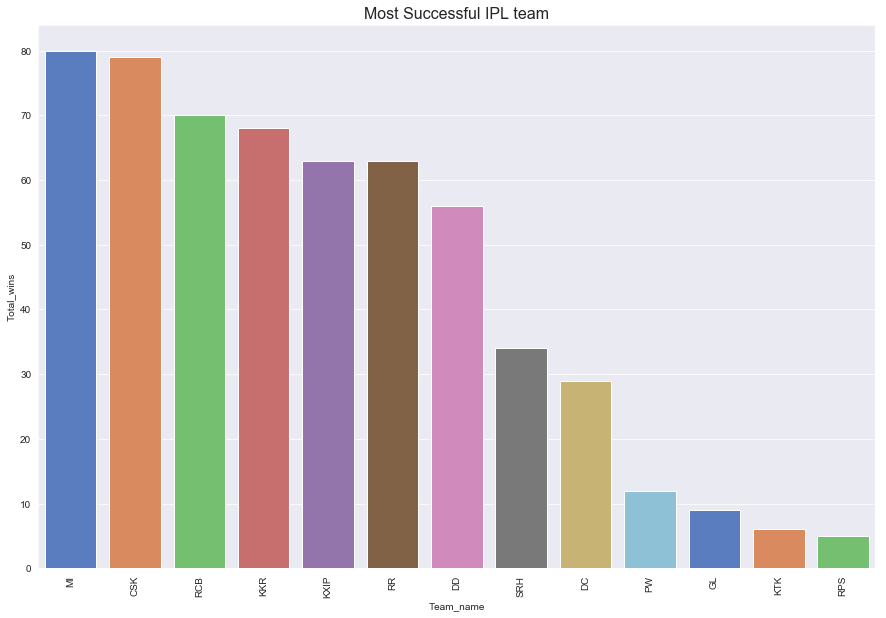

In [57]:
#<----------------------------------most successful IPL team---------------------------------------------->

successful_team=data2.Match_Winner_Id.value_counts().reset_index()
successful_team=successful_team.rename(columns={'index':'Team_Id'})
teams=data5.loc[:,('Team_Id','Team_Short_Code')]
teams=teams.rename(columns={'Team_Short_Code':'Team_name'})
teams=teams.merge(successful_team,on='Team_Id')
teams=teams.sort_values(by='Match_Winner_Id',ascending=False).drop('Team_Id'
    ,axis=1).rename(columns={'Match_Winner_Id':'Total_wins'})

print('\n\n<---------------------------MOST WINS FOR A TEAM------------------------------------\n\n')
print(teams)

plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x='Team_name', y="Total_wins", data=teams,palette='muted')
#sns.palplot(sns.hls_palette(8, l=.3, s=.8))
plt.title('Most Successful IPL team',fontsize=16)
plt.xticks(rotation=90)

In [64]:
#<-------------------------------------- D/Wl ------------------------------------------>


dl=data2.loc[(data2.Is_DuckWorthLewis==1),('Match_Date','Season_Id',
        'Team_Name_Id','Opponent_Team_Id','Match_Winner_Id','Win_Type','Is_DuckWorthLewis','Won_By')]
tm=data5.loc[:,('Team_Id','Team_Short_Code')]
do1=dl.rename(columns={'Team_Name_Id':'Team_Id'})
dl1=do1.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
dl1=dl1.rename(columns={'Opponent_Team_Id':'Team_Id'})
dl1=dl1.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
team=dl1.rename(columns={'Team_Short_Code_x':'Team 1','Team_Short_Code_y':'opp_team','Match_Winner_Id':'Team_Id'})
dwl=team.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
dwl=dwl[['Season_Id','Match_Date','Team 1','opp_team','Team_Short_Code']].sort_values(by='Season_Id')
dwl=dwl.rename(columns={'Team_Short_Code':'Winning_team'})

print('\n\n<-----------------------DUCK-WORTH LOUIS MATCHES IN ALL SEASONS-------------------------------->\n\n')
print(dwl)





<-----------------------DUCK-WORTH LOUIS MATCHES IN ALL SEASONS-------------------------------->


    Season_Id Match_Date Team 1 opp_team Winning_team
0           1  17-May-08     DD     KXIP         KXIP
3           1  18-May-08    KKR      CSK          CSK
1           2  19-Apr-09     DD     KXIP           DD
2           2   7-May-09    CSK     KXIP          CSK
11          2  21-Apr-09   KXIP      KKR          KKR
5           4  14-May-11    RCB      KKR          RCB
9           4   7-May-11    KKR      CSK          KKR
12          4  18-Apr-11    KTK      CSK          KTK
7           7  10-May-14     DD      SRH          SRH
6           8  15-May-15    SRH      RCB          RCB
8           8  22-Apr-15    SRH      KKR          SRH
4           9  18-May-16    RCB     KXIP          RCB
10          9  14-May-16    KKR      RPS          KKR
13          9  26-Apr-16    SRH      RPS          RPS
14          9  17-May-16    RPS       DD          RPS




<--------------------UMPIRES AND THEIR COUNT OF MATCHES------------------------>


              Player_Name  Total_matches_as_umpires
0         HDPK Dharmasena                        73
1               Asad Rauf                        51
2               Aleem Dar                        38
3               BF Bowden                        37
4            AK Chaudhary                        35
5             BR Doctrove                        34
6                  S Ravi                        34
7               M Erasmus                        29
8             RE Koertzen                        20
9                S Asnani                        19
10              JD Cloete                        16
11             BG Jerling                        13
12         RK Illingworth                        11
13              SS Hazare                        11
14            VA Kulkarni                        11
15              MR Benson                        10
16                  S Das      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

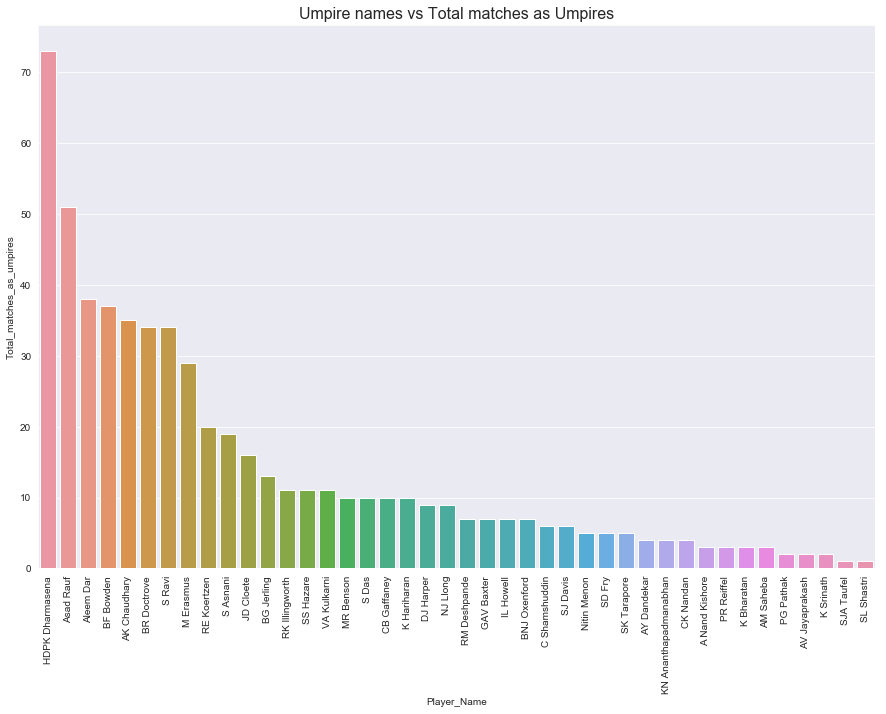

In [73]:
#<------------------------------------------Umpires count---------------------------------------->

u=data2.loc[:,('First_Umpire_Id','Match_Id')]
ump=data1.loc[(data1.Is_Umpire == 1),('Player_Id','Player_Name','Country')]
ump=ump.rename(columns={'Player_Id':'First_Umpire_Id'})
bowden=ump.merge(u,on='First_Umpire_Id')
bowden= bowden.groupby('Player_Name')['Match_Id'].count()
umpire=pd.DataFrame(bowden).sort_values(by='Match_Id'
    ,ascending=False).reset_index().rename(columns={'Match_Id':'Total_matches_as_umpires'})


top_5=umpire.head(5)
bottom_5=umpire.sort_values(by='Total_matches_as_umpires',ascending=True).head(5)

print('\n\n<--------------------UMPIRES AND THEIR COUNT OF MATCHES------------------------>\n\n')
print(umpire)

print('\n\n<------------------------TOP 5 UMPIRES WITH MAXIMUM NUMBER OF MATCHES---------------------------->\n\n')
print(top_5)


print('\n\n<------------------------BOTTOM 5 UMPIRES WITH MAXIMUM NUMBER OF MATCHES--------------------------->\n\n')

print(bottom_5)

plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x='Player_Name', y="Total_matches_as_umpires", data=umpire)
plt.title('Umpire names vs Total matches as Umpires',fontsize=16)
plt.xticks(rotation=90)


<

-------------------HIGH SCORES OF ALL PLAYERS--------------------------->
           Player_Name  High_score
5302          CH Gayle         175
56         BB McCullum         158
4543    AB de Villiers         133
5705           M Vijay         127
2157          V Sehwag         122
5420       PC Valthaty         120
2801         A Symonds         117
835         MEK Hussey         116
3069           WP Saha         115
4201          SE Marsh         115
2292     ST Jayasuriya         114
4077         MK Pandey         114
443            V Kohli         113
3157  DPMD Jayawardene         110
5829         DA Warner         109
2650      AC Gilchrist         109
2904         RG Sharma         109
8122         Q de Kock         108
1739         SR Watson         104
5207      KP Pietersen         103
3670         AM Rahane         103
7492         SPD Smith         101
7664         DA Miller         101
8355       LMP Simmons         100
4786      SR Tendulkar         100
1108         

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 <a list of 67 Text xticklabel objects>)

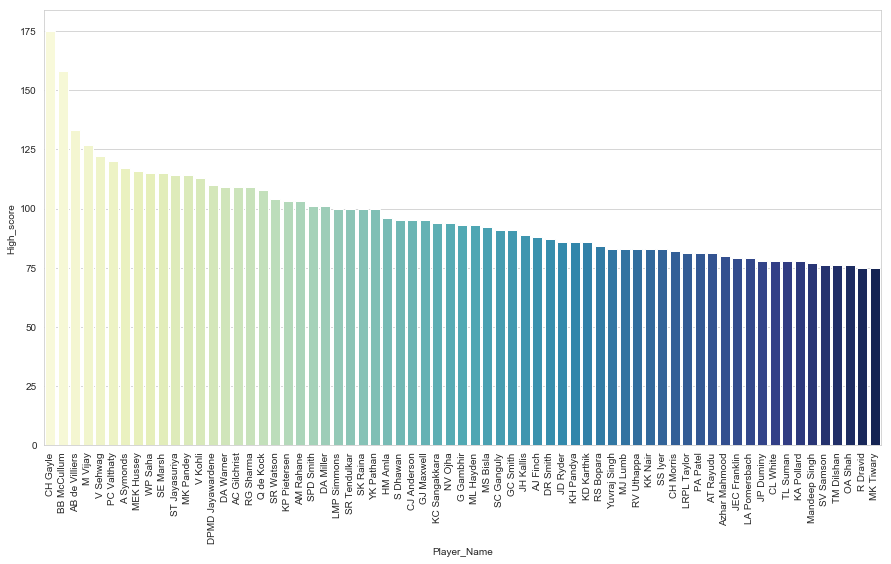

In [188]:
#<-------------------------------------High score by any player------------------------------------------>

data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
score=data.loc[:,('Match_Id','Striker_Id','Batsman_Scored')]
highest=score.groupby(['Match_Id','Striker_Id'])['Batsman_Scored'].sum()
highest=pd.DataFrame(highest).reset_index()
highest=highest.rename(columns={'Striker_Id':'Player_Id'})
player_name=data1.loc[:,('Player_Id','Player_Name')]
player_name=player_name.merge(highest,on='Player_Id').sort_values(by='Batsman_Scored',
ascending=False).drop(['Match_Id','Player_Id'],axis=1).rename(columns={'Batsman_Scored':'High_score'}).head(200)
player_name=player_name.drop_duplicates(subset='Player_Name',keep='first')
print('<\n\n-------------------HIGH SCORES OF ALL PLAYERS--------------------------->')
print(player_name)

sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.barplot(x="Player_Name", y="High_score", data=player_name,palette='YlGnBu')
plt.xticks(rotation=90)


Season 1 high runs by all teams


   Team_Id  High_score Team_name
0        1         222       KKR
1        2         181       RCB
2        3         240       CSK
3        4         221      KXIP
4        5         217        RR
5        6         194        DD
6        7         202        MI
7        8         214        DC


Season 2 high runs by all teams


   Team_Id  High_score Team_name
0        1         189       KKR
1        2         176       RCB
2        3         188       CSK
3        4         174      KXIP
4        5         211        RR
5        6         189        DD
6        7         187        MI
7        8         184        DC


Season 3 high runs by all teams


   Team_Id  High_score Team_name
0        1         200       KKR
1        2         204       RCB
2        3         246       CSK
3        4         204      KXIP
4        5         223        RR
5        6         188        DD
6        7         218        MI
7        8         190        DC


S

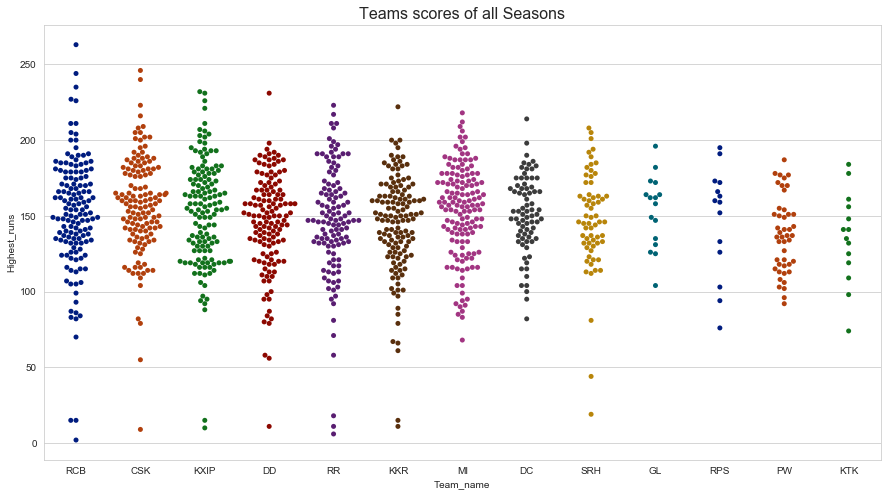

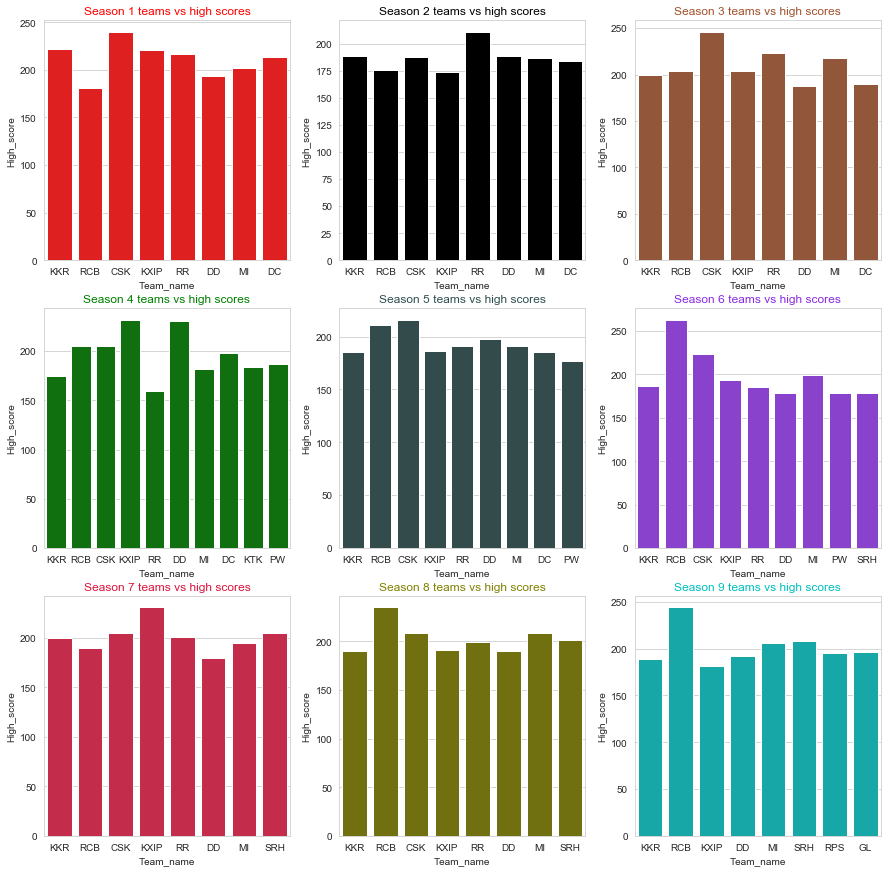

In [28]:
#<------------------------------ highest score by individual teams------------------------------------->

data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
data['Extra_Runs']=data['Extra_Runs'].replace(' ','0').astype(int)
data['Total']=data['Batsman_Scored']+data['Extra_Runs']

high=data.groupby(['Match_Id','Team_Batting_Id','Innings_Id'])['Total'].sum().reset_index()
tm=data5.loc[:,('Team_Id','Team_Short_Code')]
do1=tm.rename(columns={'Team_Id':'Team_Batting_Id'})
high_score=do1.merge(high,on='Team_Batting_Id').drop(['Innings_Id',
     'Match_Id','Team_Batting_Id'],axis=1).sort_values(by='Total'
        ,ascending=False).rename(columns={'Team_Short_Code':'Team_name','Total':'Highest_runs'})

sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.title('Teams scores of all Seasons',fontsize=16)
sns.swarmplot(x="Team_name", y="Highest_runs",palette='dark',
               data=high_score)

    
    

f,axes=plt.subplots(3,3,figsize=(15,15))

sns.set_style('whitegrid')
#<------------------------season wise highest score by any team------------------------------------>


high_score_ssn=data2.loc[:,('Match_Id','Season_Id',
        'Toss_Winner_Id','Toss_Decision')].merge(high,on='Match_Id')

teams=data5.loc[:,('Team_Id','Team_Short_Code')]



#------------------------------------------season1------------------------------------------------->


s1=high_score_ssn.loc[high_score_ssn.Season_Id==1,:].sort_values(by='Total',ascending=False)
s1=s1.sort_values(by=['Team_Batting_Id','Total'],ascending=[True,False])
max_runs=[]
a=s1['Team_Batting_Id'].unique()
for i in a:

    max_runs.append(s1.loc[(s1.Team_Batting_Id==i),]['Total'].max())

s1_runs=pd.Series(max_runs)

s1_runs=pd.DataFrame({'Team_Id':a,'High_score':s1_runs.values}).merge(teams,
                                                on='Team_Id').rename(columns={'Team_Short_Code':'Team_name'})
axes[0,0].set_title('Season 1 teams vs high scores',color='red')
sns.barplot(s1_runs['Team_name'],s1_runs['High_score']
            ,data=s1_runs, ax=axes[0,0],color='red')

print('Season 1 high runs by all teams\n\n')
print(s1_runs)
#------------------------------------------season2------------------------------------------------->

s2=high_score_ssn.loc[high_score_ssn.Season_Id==2,:].sort_values(by='Total',ascending=False)
s2=s2.sort_values(by=['Team_Batting_Id','Total'],ascending=[True,False])
max_runs=[]
a=s2['Team_Batting_Id'].unique()
for i in a:

    max_runs.append(s2.loc[(s2.Team_Batting_Id==i),]['Total'].max())

s2_runs=pd.Series(max_runs)

s2_runs=pd.DataFrame({'Team_Id':a,'High_score':s2_runs.values}).merge(teams,
                                                on='Team_Id').rename(columns={'Team_Short_Code':'Team_name'})
axes[0,1].set_title('Season 2 teams vs high scores',color='black')
sns.barplot(s2_runs['Team_name'],s2_runs['High_score'],color='black'
            ,data=s2_runs, ax=axes[0,1])

print('\n\nSeason 2 high runs by all teams\n\n')
print(s2_runs)
#------------------------------------------season3------------------------------------------------->

s3=high_score_ssn.loc[high_score_ssn.Season_Id==3,:].sort_values(by='Total',ascending=False)
s3=s3.sort_values(by=['Team_Batting_Id','Total'],ascending=[True,False])
max_runs=[]
a=s3['Team_Batting_Id'].unique()
for i in a:

    max_runs.append(s3.loc[(s3.Team_Batting_Id==i),]['Total'].max())

s3_runs=pd.Series(max_runs)

s3_runs=pd.DataFrame({'Team_Id':a,'High_score':s3_runs.values}).merge(teams,
                                                on='Team_Id').rename(columns={'Team_Short_Code':'Team_name'})
axes[0,2].set_title('Season 3 teams vs high scores',color='sienna')
sns.barplot(s3_runs['Team_name'],s3_runs['High_score'],color='sienna'
            ,data=s3_runs, ax=axes[0,2])

print('\n\nSeason 3 high runs by all teams\n\n')
print(s3_runs)
#------------------------------------------season4------------------------------------------------->

s4=high_score_ssn.loc[high_score_ssn.Season_Id==4,:].sort_values(by='Total',ascending=False)
s4=s4.sort_values(by=['Team_Batting_Id','Total'],ascending=[True,False])
max_runs=[]
a=s4['Team_Batting_Id'].unique()
for i in a:

    max_runs.append(s4.loc[(s4.Team_Batting_Id==i),]['Total'].max())

s4_runs=pd.Series(max_runs)

s4_runs=pd.DataFrame({'Team_Id':a,'High_score':s4_runs.values}).merge(teams,
                                                on='Team_Id').rename(columns={'Team_Short_Code':'Team_name'})
axes[1,0].set_title('Season 4 teams vs high scores',color='green')
sns.barplot(s4_runs['Team_name'],s4_runs['High_score'],color='green'
            ,data=s4_runs, ax=axes[1,0])

print('\n\nSeason 4 high runs by all teams\n\n')
print(s4_runs)

#------------------------------------------season5------------------------------------------------->


s5=high_score_ssn.loc[high_score_ssn.Season_Id==5,:].sort_values(by='Total',ascending=False)
s5=s5.sort_values(by=['Team_Batting_Id','Total'],ascending=[True,False])
max_runs=[]
a=s5['Team_Batting_Id'].unique()
for i in a:

    max_runs.append(s5.loc[(s5.Team_Batting_Id==i),]['Total'].max())

s5_runs=pd.Series(max_runs)

s5_runs=pd.DataFrame({'Team_Id':a,'High_score':s5_runs.values}).merge(teams,
                                                on='Team_Id').rename(columns={'Team_Short_Code':'Team_name'})
axes[1,1].set_title('Season 5 teams vs high scores',color='darkslategrey')
sns.barplot(s5_runs['Team_name'],s5_runs['High_score'],color='darkslategrey'
            ,data=s5_runs, ax=axes[1,1])

print('\n\nSeason 5 high runs by all teams\n\n')
print(s5_runs)
#------------------------------------------season6------------------------------------------------->


s6=high_score_ssn.loc[high_score_ssn.Season_Id==6,:].sort_values(by='Total',ascending=False)
s6=s6.sort_values(by=['Team_Batting_Id','Total'],ascending=[True,False])
max_runs=[]
a=s6['Team_Batting_Id'].unique()
for i in a:

    max_runs.append(s6.loc[(s6.Team_Batting_Id==i),]['Total'].max())

s6_runs=pd.Series(max_runs)

s6_runs=pd.DataFrame({'Team_Id':a,'High_score':s6_runs.values}).merge(teams,
                                                on='Team_Id').rename(columns={'Team_Short_Code':'Team_name'})
axes[1,2].set_title('Season 6 teams vs high scores',color='blueviolet')
sns.barplot(s6_runs['Team_name'],s6_runs['High_score'],color='blueviolet'
            ,data=s6_runs, ax=axes[1,2])

print('\n\nSeason 6 high runs by all teams\n\n')
print(s6_runs)
#------------------------------------------season7------------------------------------------------->


s7=high_score_ssn.loc[high_score_ssn.Season_Id==7,:].sort_values(by='Total',ascending=False)
s7=s7.sort_values(by=['Team_Batting_Id','Total'],ascending=[True,False])
max_runs=[]
a=s7['Team_Batting_Id'].unique()
for i in a:

    max_runs.append(s7.loc[(s7.Team_Batting_Id==i),]['Total'].max())

s7_runs=pd.Series(max_runs)

s7_runs=pd.DataFrame({'Team_Id':a,'High_score':s7_runs.values}).merge(teams,
                                                on='Team_Id').rename(columns={'Team_Short_Code':'Team_name'})
axes[2,0].set_title('Season 7 teams vs high scores',color='crimson')
sns.barplot(s7_runs['Team_name'],s7_runs['High_score'],color='crimson'
            ,data=s7_runs, ax=axes[2,0])

print('\n\nSeason 7 high runs by all teams\n\n')
print(s7_runs)
#------------------------------------------season8------------------------------------------------->

s8=high_score_ssn.loc[high_score_ssn.Season_Id==8,:].sort_values(by='Total',ascending=False)
s8=s8.sort_values(by=['Team_Batting_Id','Total'],ascending=[True,False])
max_runs=[]
a=s8['Team_Batting_Id'].unique()
for i in a:

    max_runs.append(s8.loc[(s8.Team_Batting_Id==i),]['Total'].max())

s8_runs=pd.Series(max_runs)

s8_runs=pd.DataFrame({'Team_Id':a,'High_score':s8_runs.values}).merge(teams,
                                                on='Team_Id').rename(columns={'Team_Short_Code':'Team_name'})

axes[2,1].set_title('Season 8 teams vs high scores',color='olive')
sns.barplot(s8_runs['Team_name'],s8_runs['High_score'],color='olive'
            ,data=s8_runs, ax=axes[2,1])

print('\n\nSeason 8 high runs by all teams\n\n')
print(s8_runs)
#------------------------------------------season9------------------------------------------------->

s9=high_score_ssn.loc[high_score_ssn.Season_Id==9,:].sort_values(by='Total',ascending=False)
s9=s9.sort_values(by=['Team_Batting_Id','Total'],ascending=[True,False])
max_runs=[]
a=s9['Team_Batting_Id'].unique()
for i in a:

    max_runs.append(s9.loc[(s9.Team_Batting_Id==i),]['Total'].max())

s9_runs=pd.Series(max_runs)

s9_runs=pd.DataFrame({'Team_Id':a,'High_score':s9_runs.values}).merge(teams,
                                                on='Team_Id').rename(columns={'Team_Short_Code':'Team_name'})

axes[2,2].set_title('Season 9 teams vs high scores',color='c')
sns.barplot(s9_runs['Team_name'],s9_runs['High_score'],color='c'
            ,data=s9_runs, ax=axes[2,2])

print('\n\nSeason 9 high runs by all teams\n\n')
print(s9_runs)





<-------------------------Most_Fifties by any player------------------------------>


         Player_Name  Most_fifties
0         SC Ganguly             7
1        BB McCullum            11
2          DJ Hussey             5
3           R Dravid            11
4           W Jaffer             1
5            V Kohli            26
6          JH Kallis            17
7           CL White             6
8         MV Boucher             1
9           PA Patel             8
10         ML Hayden             8
11        MEK Hussey            15
12          MS Dhoni            16
13          SK Raina            28
14       S Badrinath            11
15          JR Hopes             4
16     KC Sangakkara            10
17      Yuvraj Singh            10
18         SM Katich             2
19         IK Pathan             1
20         YK Pathan            12
21         SR Watson            14
22         G Gambhir            31
23          V Sehwag            16
24          S Dhawan            25
25

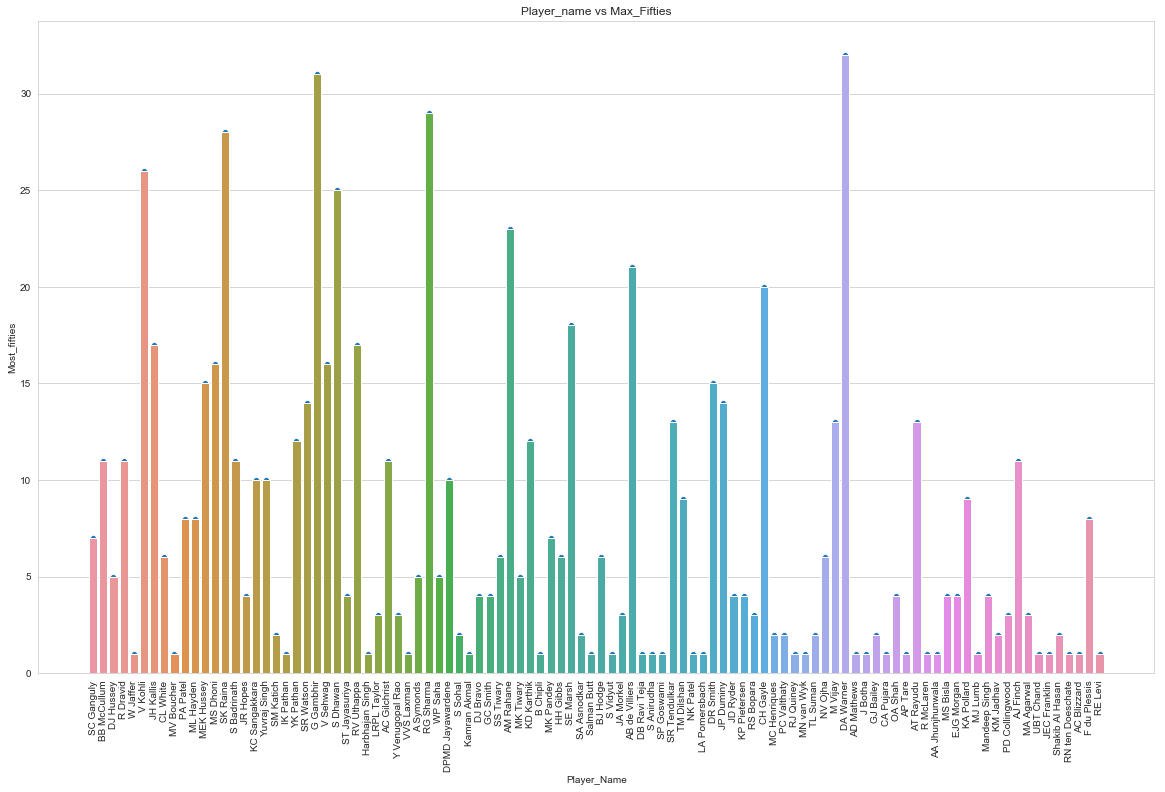

In [127]:
#<---------------------------------Most_Fifties---------------------------------------------->

fifty=data.groupby(['Match_Id','Striker_Id','Innings_Id'])['Batsman_Scored'].sum().reset_index()
fifty=fifty.loc[(fifty.Batsman_Scored >= 50) & (fifty.Batsman_Scored < 100),('Striker_Id',
      'Batsman_Scored')].groupby('Striker_Id')['Batsman_Scored'].count().reset_index()
plr=data1.loc[:,('Player_Id','Player_Name')]
plr = plr.rename (columns={'Player_Id':'Striker_Id'})
most_fifties=plr.merge(fifty,on='Striker_Id').drop('Striker_Id'
            ,axis=1).rename(columns={'Batsman_Scored':'Most_fifties'}).head(100)

print('\n\n<-------------------------Most_Fifties by any player------------------------------>\n\n')
print(most_fifties)

x=most_fifties['Player_Name']
y=most_fifties['Most_fifties']
plt.figure(figsize=(20,12))
sns.barplot(x='Player_Name', y="Most_fifties", data=most_fifties)
plt.title('Player_name vs Max_Fifties')
plt.xticks(rotation=90)
sns.scatterplot(x,y,data=most_fifties)



<------------------------------MOST_HUNDREDS BY ANY PLAYER------------------------------->


         Player_Name  Most_hundreds
19          CH Gayle              5
1            V Kohli              4
16    AB de Villiers              3
0        BB McCullum              2
5          SR Watson              2
6           V Sehwag              2
22         DA Warner              2
8       AC Gilchrist              2
21           M Vijay              2
25         Q de Kock              1
24         DA Miller              1
23         SPD Smith              1
20       PC Valthaty              1
18      KP Pietersen              1
17      SR Tendulkar              1
13         AM Rahane              1
15          SE Marsh              1
14         MK Pandey              1
12  DPMD Jayawardene              1
11           WP Saha              1
10         RG Sharma              1
9          A Symonds              1
7      ST Jayasuriya              1
4          YK Pathan              1
3    

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 <a list of 27 Text xticklabel objects>)

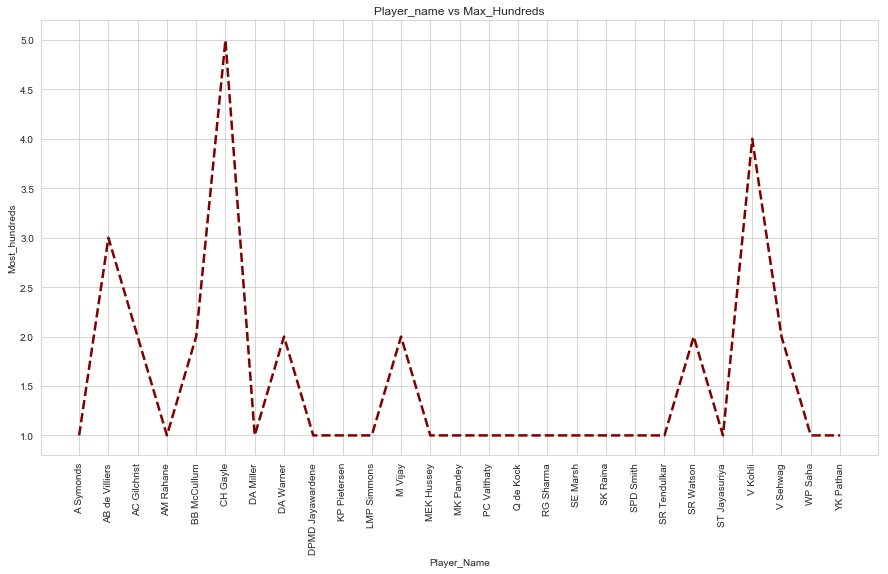

In [129]:
#<--------------------------------------most_hundreds--------------------------------------------->

hundred=data.groupby(['Match_Id','Striker_Id','Innings_Id'])['Batsman_Scored'].sum().reset_index()
hundred=hundred.loc[(hundred.Batsman_Scored >= 100),('Striker_Id',
'Batsman_Scored')].groupby('Striker_Id')['Batsman_Scored'].count().reset_index()
hundred
plr=data1.loc[:,('Player_Id','Player_Name')]
plr = plr.rename (columns={'Player_Id':'Striker_Id'})
most_hundreds=plr.merge(hundred,on='Striker_Id').drop('Striker_Id',axis=1).sort_values(by='Batsman_Scored',
                                ascending=False).rename(columns={'Batsman_Scored':'Most_hundreds'})

print('\n\n<------------------------------MOST_HUNDREDS BY ANY PLAYER------------------------------->\n\n')
print(most_hundreds)
#<------------------------------------------most_hundreds---------------------------------->


plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
grid=sns.lineplot(x='Player_Name', y='Most_hundreds', data=most_hundreds ,
                  linewidth=2.5,color='maroon')
plt.title('Player_name vs Max_Hundreds')
grid.lines[0].set_linestyle("--")
plt.xticks(rotation=90)




<--------------------------------------CSK VS MI RIVELARY--------------------------------------->


  Team_Short_Code  Total_wins  win_percentage
0             CSK           8            57.0
1              MI           6            43.0


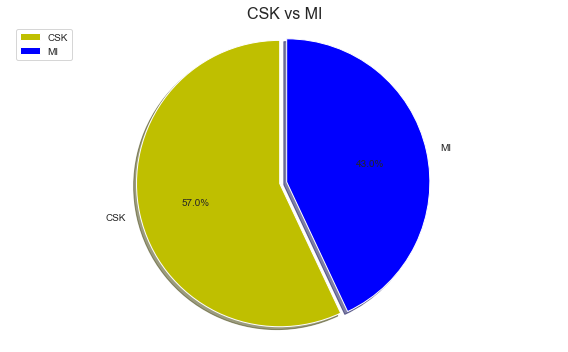

In [133]:
#<-------------------------------------------csk vs MI rivelary------------------------------------->

t_win=data2.loc[(data2.Team_Name_Id== 3) & (data2.Opponent_Team_Id== 7),('Season_Id',
                        'Team_Name_Id','Opponent_Team_Id','Match_Winner_Id')]
wins=t_win.Match_Winner_Id.value_counts()
wins=pd.DataFrame(wins).reset_index().rename(columns={'index':'Team_Id','Match_Winner_Id':'Total_wins'})
tm=data5.loc[:,('Team_Id','Team_Short_Code')]
total_wins=tm.merge(wins,on="Team_Id").drop('Team_Id',axis=1)
total_wins['win_percentage']=round((total_wins.Total_wins*100)/14)

print('\n\n<--------------------------------------CSK VS MI RIVELARY--------------------------------------->\n\n')
print(total_wins)

colors=['y','blue']
plt.figure(figsize=(8,5))
plt.pie(total_wins['win_percentage'],labels=total_wins['Team_Short_Code'],autopct='%1.1f%%'
        ,colors=colors,shadow=True,startangle=90,explode=(0.05,0))
plt.axis('equal')
plt.legend(total_wins.Team_Short_Code,loc=2)
plt.title('CSK vs MI',fontsize=16)
plt.tight_layout()
plt.show()




<------------------------- WICKET TYPES AND THIER COUNTS----------------------------------->


          Dissmisal_Type  Total
0                 caught   3245
1                 bowled   1028
2                run out    583
3                    lbw    326
4                stumped    187
5      caught and bowled    148
6           retired hurt      8
7             hit wicket      6
8  obstructing the field      1


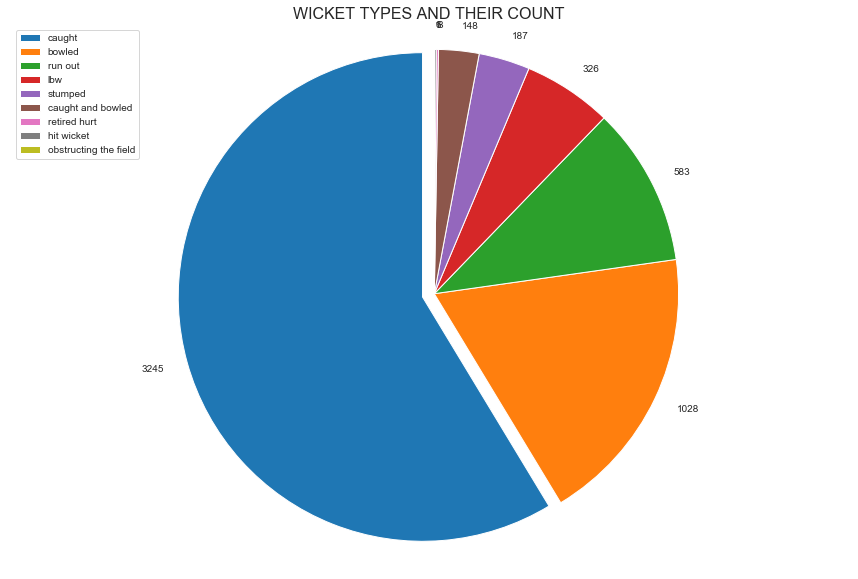

In [135]:
#<-------------------------------dissmisal types and their counts--------------------------------------->

t_wickets=data.loc[(data.Dissimal_Type!=' '),('Match_Id','Dissimal_Type')]
t_wickets=t_wickets.Dissimal_Type.value_counts()
t_wickets=t_wickets.reset_index().rename(columns={'index':'Dissmisal_Type','Dissimal_Type':'Total'})

print('\n\n<------------------------- WICKET TYPES AND THIER COUNTS----------------------------------->\n\n')
print(t_wickets)

plt.figure(figsize=(15,10))
plt.pie(t_wickets['Total'],labels=t_wickets['Total'],shadow=False,startangle=90,explode=(0.05,0,
                                                            0,0,0,0,0,0,0))
plt.axis('equal')
plt.legend(t_wickets.Dissmisal_Type,loc=2)
plt.title('WICKET TYPES AND THEIR COUNT',fontsize=16)
plt.show()



<----------------------------SEASON WISE PERFORMANCE OF SOME PLAYERS-------------------------------->


     Season_Id Player_Name  Total_runs
119          1    SK Raina         421
185          1    MS Dhoni         414
137          1   RG Sharma         404
8            1     V Kohli         165
118          2    SK Raina         434
141          2   RG Sharma         362
190          2    MS Dhoni         332
7            2     V Kohli         246
24           2    CH Gayle         184
114          3    SK Raina         528
138          3   RG Sharma         404
6            3     V Kohli         307
21           3    CH Gayle         292
191          3    MS Dhoni         287
19           4    CH Gayle         604
2            4     V Kohli         557
117          4    SK Raina         438
186          4    MS Dhoni         392
140          4   RG Sharma         372
17           5    CH Gayle         733
116          5    SK Raina         441
136          5   RG Sharma         4

<Figure size 1080x720 with 0 Axes>

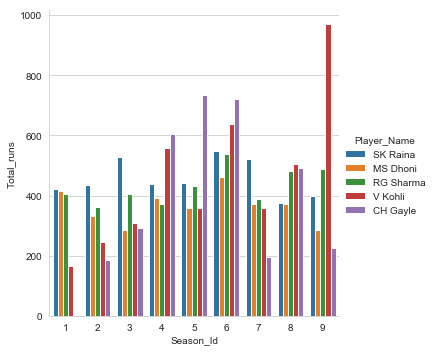

In [136]:
#player performance in each season

data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
h_score=data.loc[:,('Match_Id','Striker_Id','Batsman_Scored')]
season=data2.loc[:,('Match_Id','Season_Id')]
season=pd.merge(h_score,season,on='Match_Id')
highest_runs=season.groupby(['Season_Id','Striker_Id'])['Batsman_Scored'].sum().reset_index()
player=data1.loc[:,('Player_Id','Player_Name')].rename(columns={'Player_Id':'Striker_Id'})
highest_runs=highest_runs.sort_values(by='Batsman_Scored',ascending=False)
Top_10=highest_runs.merge(player,on='Striker_Id').rename(columns={'Batsman_Scored':'Total_runs'})
Top_10=Top_10.sort_values(by=['Season_Id','Total_runs'],ascending=[True,False]).drop('Striker_Id',axis=1)
Top_10=Top_10[['Season_Id','Player_Name','Total_runs']]
Top_10=Top_10.loc[(Top_10.Player_Name=='SK Raina') | (Top_10.Player_Name=='MS Dhoni') | (Top_10.Player_Name=='V Kohli') | (Top_10.Player_Name=='RG Sharma') | (Top_10.Player_Name=='CH Gayle'),:]

print('\n\n<----------------------------SEASON WISE PERFORMANCE OF SOME PLAYERS-------------------------------->\n\n')
print(Top_10)

plt.figure(figsize=(15,10))
sns.catplot(x="Season_Id", y="Total_runs", hue="Player_Name", kind="bar",
              data=Top_10);

In [34]:
#dot_balls=data.loc[(data.Over_Id>= 16) & (data.Batsman_Scored== 0),
 #('Match_Id','Over_Id','Ball_Id',
  #'Bowler_Id','Batsman_Scored')].groupby('Bowler_Id')['Ball_Id'].count().reset_index()
#death_bowler=dot_balls.sort_values(by='Bowler_Id',
 #           ascending=True).rename(columns={'Ball_Id':'Total_dot_balls'})


#a=data.loc[(data.Over_Id>=16),
# ('Match_Id','Over_Id','Ball_Id',
#  'Bowler_Id','Batsman_Scored')]
#total_balls=a.groupby('Bowler_Id')['Ball_Id'].count()
#total_balls=total_balls.sort_values(by='Bowler_Id',ascending=True).rename(columns={'Ball_Id':'Total_balls'})
#total_balls
#death_bowler['Total_balls'] = total_balls['Total_balls']
#death_bowler['Dot_ball_percentage']= (death_bowler['Total_dot_balls'] * 100)/ death_bowler['Total_balls']
#death_bowler.sort_values(by='Dot_ball_percentage',ascending=False)



<-------------------------TOTAL RUNS ACROSS EACH SEASON--------------------------------->


   Season_Year  Total_runs
0         2008       17922
1         2009       16349
2         2010       18878
3         2011       21142
4         2012       21333
5         2013       22204
6         2014       18926
7         2015       18353
8         2016       18858


Text(0.5, 1.0, 'Total Runs In Each Season')

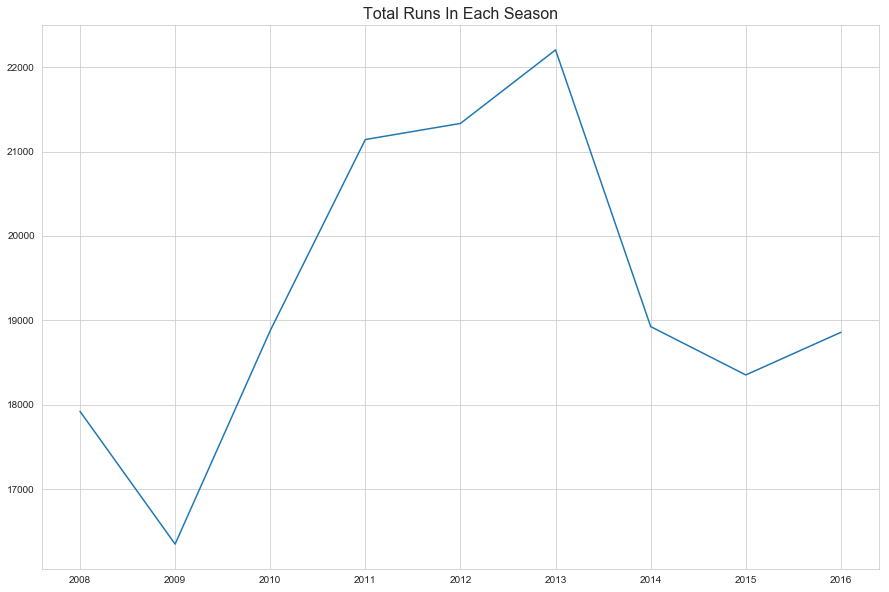

In [138]:
#<----------------------------------total runs across each season---------------------------------------->

match=data.loc[:,('Match_Id','Team_Batting_Id','Team_Bowling_Id','Total')]
season_id=data2.loc[:,('Match_Id','Season_Id')].merge(match,
        on='Match_Id').groupby('Season_Id')['Total'].sum().reset_index()
total_runs=data4.loc[:,('Season_Id','Season_Year')].merge(season_id,
        on='Season_Id').drop('Season_Id',axis=1).rename(columns={'Total':'Total_runs'})

print('\n\n<-------------------------TOTAL RUNS ACROSS EACH SEASON--------------------------------->\n\n')
print(total_runs)

plt.figure(figsize=(15,10))
plt.plot(total_runs['Season_Year'],total_runs['Total_runs'])
plt.title('Total Runs In Each Season',fontsize=16)



<------------------------------TEAMS AND THIER WIN TYPES------------------------------------->


     Season_Id Team_1 Opp_Teams    Win_Type  Won_By
0            1    KKR        DC  by wickets     5.0
382          1    CSK      KXIP  by wickets     9.0
391          1     RR      KXIP  by wickets     6.0
397          1     DD      KXIP     by runs     6.0
161          1     DC       RCB  by wickets     5.0
407          1     MI      KXIP     by runs     1.0
154          1     MI       RCB  by wickets     5.0
415          1     DC      KXIP  by wickets     7.0
146          1     DD       RCB     by runs    10.0
139          1     RR       RCB     by runs    65.0
175          1    KKR        DD     by runs    23.0
131          1   KXIP       RCB  by wickets     9.0
114          1    KKR       RCB     by runs     5.0
99           1     DC        MI     by runs    25.0
507          1    RCB       KKR     by runs   140.0
89           1     DD        MI  by wickets     5.0
517          1   

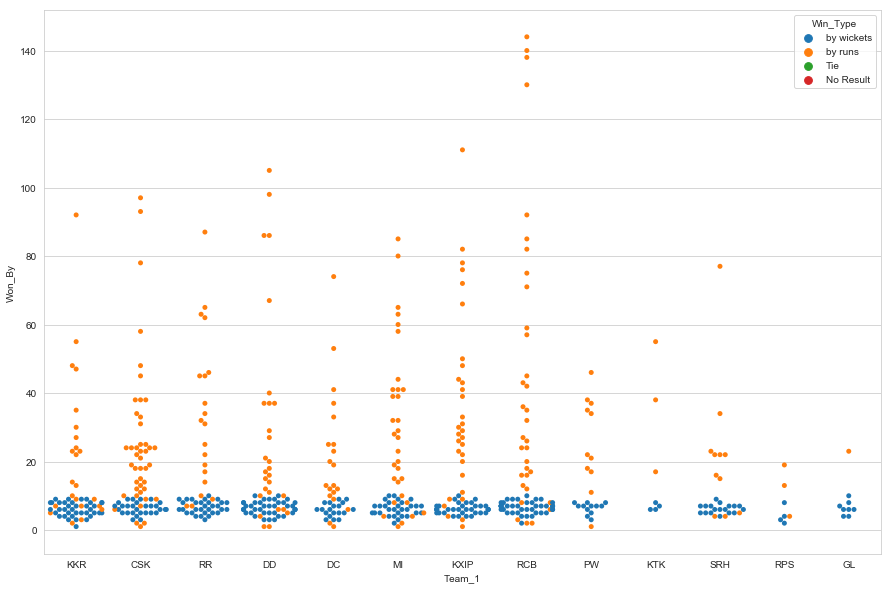

In [190]:
#<------------------------------------Teams and their win types------------------------------------------>

wintype = data2.loc[:,('Season_Id','Team_Name_Id',
'Opponent_Team_Id','Win_Type','Won_By')].rename(columns={'Team_Name_Id':'Team_Id'})
teams=data5.loc[:,('Team_Id','Team_Short_Code')]
wintype=data5.loc[:,('Team_Id','Team_Short_Code')].merge(wintype,
    on='Team_Id').drop('Team_Id',axis=1).rename(columns={'Team_Short_Code':'Team_1',
        'Opponent_Team_Id':'Team_Id'}).merge(teams,on='Team_Id').drop('Team_Id',
            axis=1).rename(columns={'Team_Short_Code':'Opp_Teams'}).sort_values(by='Season_Id')

wintype=wintype[['Season_Id','Team_1','Opp_Teams','Win_Type','Won_By']]

print('\n\n<------------------------------TEAMS AND THIER WIN TYPES------------------------------------->\n\n')
print(wintype)

plt.figure(figsize=(15,10))
sns.swarmplot(x="Team_1", y="Won_By",hue='Win_Type',data=wintype)





<------------------------------------BEST CHASING GROUND------------------------------->


                                    Venue_Name  Win_Type
7                                 Eden Gardens        32
14                       M Chinnaswamy Stadium        31
8                             Feroz Shah Kotla        28
23   Rajiv Gandhi International Stadium, Uppal        26
34                            Wankhede Stadium        24
26                      Sawai Mansingh Stadium        23
22  Punjab Cricket Association Stadium, Mohali        20
15             MA Chidambaram Stadium, Chepauk        17
4                   Dr DY Patil Sports Academy        10
32                             SuperSport Park         8


<------------------------------------BEST DEFENDING GROUND------------------------------->


                                    Venue_Name  Win_Type
13             MA Chidambaram Stadium, Chepauk        30
32                            Wankhede Stadium        25
12            

Text(0.5, 1.0, 'Top_10 Best Defending Grounds')

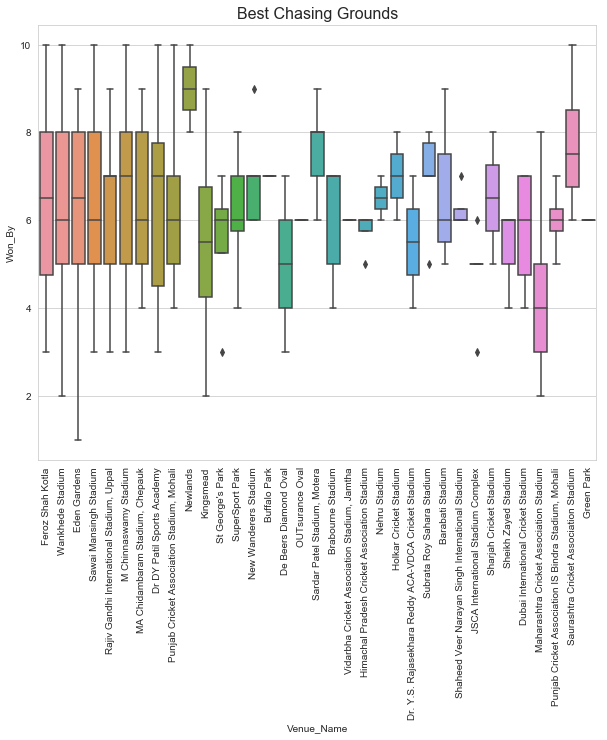

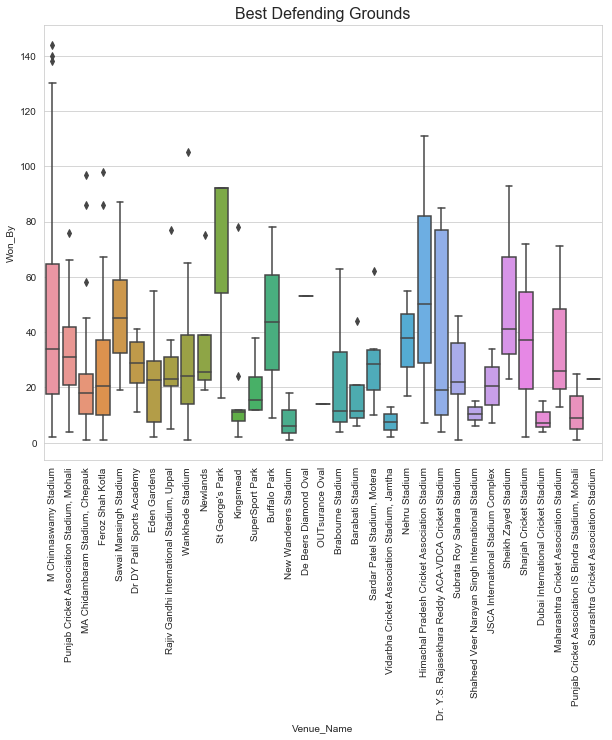

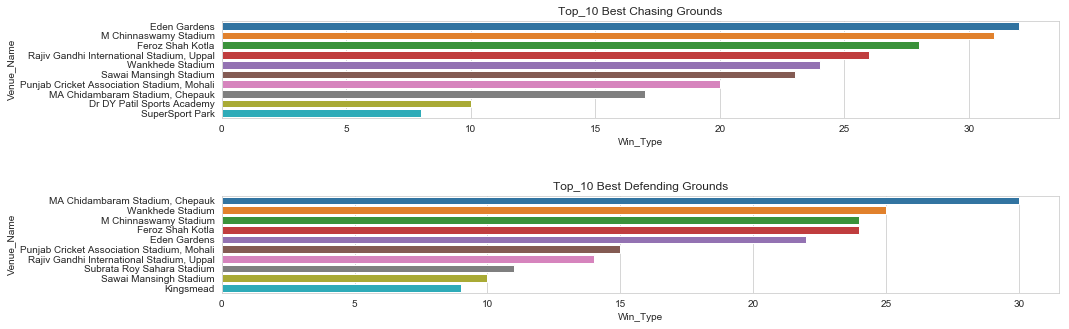

In [185]:
#<-------------------------------------Best Chasing Ground------------------------------------->

stadium = data2.loc[(data2.Win_Type=='by wickets'),('Match_Id','Season_Id',
                'Venue_Name','Win_Type','Won_By')]

chasing_ground=stadium.groupby('Venue_Name')['Win_Type'].count().reset_index().sort_values(by='Win_Type'
                                                        ,ascending=False).head(10)

print('\n\n<------------------------------------BEST CHASING GROUND------------------------------->\n\n')
print(chasing_ground)


plt.figure(figsize=(10,8))
sns.boxplot(x="Venue_Name", y="Won_By", data=stadium)
plt.title('Best Chasing Grounds',fontsize=16)
plt.xticks(rotation=90)


#<--------------------------------------Best defending ground-------------------------------------->
stadium1 = data2.loc[(data2.Win_Type=='by runs'),('Match_Id','Season_Id',
                'Venue_Name','Win_Type','Won_By')]

defending_ground=stadium1.groupby('Venue_Name')['Win_Type'].count().reset_index().sort_values(by='Win_Type'
                                                        ,ascending=False).head(10)

print('\n\n<------------------------------------BEST DEFENDING GROUND------------------------------->\n\n')
print(defending_ground)

plt.figure(figsize=(10,8))
sns.boxplot(x="Venue_Name", y="Won_By", data=stadium1)
plt.title('Best Defending Grounds',fontsize=16)
plt.xticks(rotation=90)


#<------------------------------------------subplots------------------------------------------------->
f,axes=plt.subplots(2,1,figsize=(15,5))
plt.subplots_adjust(hspace = 0.8)
sns.barplot(x="Win_Type", y="Venue_Name",data=chasing_ground,ax=axes[0])
axes[0].set_title('Top_10 Best Chasing Grounds')

sns.barplot(x="Win_Type", y="Venue_Name",data=defending_ground,ax=axes[1])
axes[1].set_title('Top_10 Best Defending Grounds')

#axes[1].bar(x="Venue_Name", y="Win_Type",data=chasing_ground)



In [38]:
#teams and their players
teams=data2.loc[:,('Match_Id','Season_Id')].merge(data3,on='Match_Id').sort_values(by=['Season_Id','Team_Id'],
                    ascending=[True,True]).drop(['Is_Keeper','Is_Captain','Match_Id'],axis = 1)

players=data1.loc[:,('Player_Id','Player_Name')].merge(teams,on='Player_Id').drop('Player_Id',axis=1)
group=players.groupby(['Season_Id','Team_Id'])['Player_Name'].unique().reset_index()
ss = pd.DataFrame(group)

                #<-------------------season1 players and teams------------------------>
s1=ss.loc[(ss.Season_Id==1),:]
l=[]
for i in s1['Player_Name']:
    l.append(i)
    
    
season1=pd.DataFrame(l).T
season1=season1.head(16)
season1=season1.rename(columns={0:'KKR',1:'RCB',2:'CSK',3:'KXIP',4:'RR',5:'DD',6:'MI',7:'DC'})
print('\n\n-----------season1 teams and their players----------------\n\n')
print(season1)


                #<-------------------season2 players and teams------------------------>
s2=ss.loc[(ss.Season_Id==2),:]
l=[]
for i in s2['Player_Name']:
    l.append(i)
    
    
season2=pd.DataFrame(l).T
season2=season2.head(16)
season2=season2.rename(columns={0:'KKR',1:'RCB',2:'CSK',3:'KXIP',4:'RR',5:'DD',6:'MI',7:'DC'})
print('\n\n-----------------season2 teams and their players-----------------\n\n')
print(season2)


                #<-------------------season3 players and teams------------------------>
s3=ss.loc[(ss.Season_Id==3),:]
l=[]
for i in s3['Player_Name']:
    l.append(i)
    
    
season3=pd.DataFrame(l).T
season3=season3.head(16)
season3=season3.rename(columns={0:'KKR',1:'RCB',2:'CSK',3:'KXIP',4:'RR',5:'DD',6:'MI',7:'DC'})
print('\n\n-----------------season3 teams and their players--------------------\n\n')
print(season3)


                #<-------------------season4 players and teams------------------------>
s4=ss.loc[(ss.Season_Id==4),:]
l=[]
for i in s4['Player_Name']:
    l.append(i)
    
    
season4=pd.DataFrame(l).T
season4=season4.head(16)
season4=season4.rename(columns={0:'KKR',1:'RCB',2:'CSK',3:'KXIP',4:'RR',5:'DD',6:'MI',7:'DC',8:'KTK',9:'PW'})
print('\n\n----------------season4 teams and their players---------------------\n\n')
print(season4)


                #<-------------------season5 players and teams------------------------>
s5=ss.loc[(ss.Season_Id==5),:]
l=[]
for i in s5['Player_Name']:
    l.append(i)
    
    
season5=pd.DataFrame(l).T
season5=season5.head(16)
season5=season5.rename(columns={0:'KKR',1:'RCB',2:'CSK',3:'KXIP',4:'RR',5:'DD',6:'MI',7:'DC',8:'PW'})
print('\n\n---------------------season5 teams and their players-----------------------\n\n')
print(season5)


                #<-------------------season6 players and teams------------------------>
s6=ss.loc[(ss.Season_Id==6),:]
l=[]
for i in s6['Player_Name']:
    l.append(i)
    
    
season6=pd.DataFrame(l).T
season6=season6.head(16)
season6=season6.rename(columns={0:'KKR',1:'RCB',2:'CSK',3:'KXIP',4:'RR',5:'DD',6:'MI',7:'PW',8:'SRH'})
print('\n\n---------------------season6 teams and their players------------------------\n\n')
print(season6)


                #<-------------------season7 players and teams------------------------>
s7=ss.loc[(ss.Season_Id==7),:]
l=[]
for i in s7['Player_Name']:
    l.append(i)
    
    
season7=pd.DataFrame(l).T
season7=season7.head(16)
season7=season7.rename(columns={0:'KKR',1:'RCB',2:'CSK',3:'KXIP',4:'RR',5:'DD',6:'MI',7:'SRH'})
print('\n\n------------------season7 teams and their players-----------------------------\n\n')
print(season7)


                #<-------------------season8 players and teams------------------------>
s8=ss.loc[(ss.Season_Id==8),:]
l=[]
for i in s8['Player_Name']:
    l.append(i)
    
    
season8=pd.DataFrame(l).T
season8=season8.head(16)
season8=season8.rename(columns={0:'KKR',1:'RCB',2:'CSK',3:'KXIP',4:'RR',5:'DD',6:'MI',7:'SRH'})
print('\n\n----------------------------season8 teams and their players-----------------------\n\n')
print(season8)


                #<-------------------season9 players and teams------------------------>
s9=ss.loc[(ss.Season_Id==9),:]
l=[]
for i in s9['Player_Name']:
    l.append(i)
    
    
season9=pd.DataFrame(l).T
season9=season9.head(16)
season9=season9.rename(columns={0:'KKR',1:'RCB',2:'KXIP',3:'DD',4:'MI',5:'SRH',6:'RPS',7:'GL'})
print('\n\n--------------------------season9 teams and their players---------------------------\n\n')
print(season9)




-----------season1 teams and their players----------------


                KKR            RCB              CSK              KXIP  \
0        SC Ganguly       R Dravid         PA Patel            K Goel   
1       BB McCullum       W Jaffer        ML Hayden          JR Hopes   
2        RT Ponting        V Kohli       MEK Hussey     KC Sangakkara   
3         DJ Hussey      JH Kallis         MS Dhoni      Yuvraj Singh   
4   Mohammad Hafeez       CL White         SK Raina         SM Katich   
5           WP Saha     MV Boucher         JDP Oram         IK Pathan   
6         LR Shukla        B Akhil      S Badrinath  DPMD Jayawardene   
7        AB Agarkar      AA Noffke       SP Fleming           S Sohal   
8          M Kartik        P Kumar         S Vidyut             B Lee   
9          I Sharma         Z Khan        JA Morkel         PP Chawla   
10           DB Das       SB Joshi  Joginder Sharma           WA Mota   
11      Salman Butt  S Chanderpaul          MS Gony         R